# Problem Statement
Context
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# 1. DATA OVERVIEW

# 1.1 Import the Libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Print the versions of Numpy, Pandas and Seaborn
print("The version of Numpy is: ", np.__version__)
print("The version of Pandas is: ", pd.__version__)
print("The version of Seaborn is: ", sns.__version__)

The version of Numpy is:  1.24.3
The version of Pandas is:  1.5.3
The version of Seaborn is:  0.12.2


# 1.2 Loading Data austo_automobile.csv

In [3]:
#Get the working directory
os.getcwd()

'C:\\Users\\ramas\\Great Learning\\SMDM'

In [4]:
# Load the .csv file
df_auto = pd.read_csv('austo_automobile.csv')

# 1.3 Check the structure of the data

In [5]:
#View the top 5 records
df_auto.head(5)

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

In [6]:
#View the bottom 5 records
df_auto.tail(5)

Age Gender Profession Marital_status Education  No_of_Dependents  \
1576   22   Male   Salaried         Single  Graduate                 2   
1577   22   Male   Business        Married  Graduate                 4   
1578   22   Male   Business         Single  Graduate                 2   
1579   22   Male   Business        Married  Graduate                 3   
1580   22   Male   Salaried        Married  Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
1576            No        Yes              No   33300             0.0   
1577            No         No              No   32000             NaN   
1578            No        Yes              No   32900             0.0   
1579           Yes        Yes              No   32200             NaN   
1580            No         No              No   31600             0.0   

      Total_salary  Price       Make  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  
1578         32900  30000  Hatchback  
1579         32200  24000  Hatchback  
1580         31600  31000  Hatchback

# 1.3.1 No. of rows and columns in the dataset

In [7]:
print(" Number of rows in the dataset: ", df_auto.shape[0],"\n","Number of columns in the dataset: ", df_auto.shape[1])

 Number of rows in the dataset:  1581 
 Number of columns in the dataset:  14


# 1.4 Check the types of the data

In [8]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


There are 5 fields with integer datatype, 8 fields with object datatype and 1 field with float datatype. That is, 8 fields are categorical in nature while 6 fields are numerical data.

# 1.5 Check the statistical summary

# Descriptive Summary of Numerical data and Categorical data

In [9]:
#Descriptive Summary of Numerical data

df_auto.describe()

Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1475.000000   
mean     31.922201          2.457938  60392.220114    20225.559322   
std       8.425978          0.943483  14674.825044    19573.149277   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    25600.000000   
75%      38.000000          3.000000  71800.000000    38300.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000

# Insights from statistical summary of numerical fields.

* Note the mean, min and max value of all the numerical fields. 
* For example, The mean age of people who want to buy a car is around 31 years while the minimum age is 22 years. Maximumm age     of people wanting to buy a car is 54 years. 
* Similarly, the mean salary of a personal wanting to buy a car is 60,392 while the maximum salary is 99300 and the minimum is     30000. 
* The average price of a car is 31000. The highest price of the car is 70000 and lowest is 18000.  
* In this way, we can make a useful analysis of the data given to us.

In [10]:
#Descriptive Summary of Categorical data
df_auto.describe(include ='object').T

count unique            top  freq
Gender           1528      4           Male  1199
Profession       1581      2       Salaried   896
Marital_status   1581      2        Married  1443
Education        1581      2  Post Graduate   985
Personal_loan    1581      2            Yes   792
House_loan       1581      2             No  1054
Partner_working  1581      2            Yes   868
Make             1581      3          Sedan   702

# Insights from the statistical summary of categorical data:

* Gender, Profession, Marital_status, Education, Personal_loan, House_loan, Partner_working and Make are categorical in nature.
* Age, No_of_Dependents, Salary, Partner_salary, Total_salary and Price are numerical in nature. 
* We observe that out of 1528 people who want to buy a car, 1199 are males and remaining females. 
* Married people outweigh the unmarried people who want to buy a car.
* About 985 people out of a total of 1581 people are postgraduates.
* Salaried people wanting to buy a car add up to 896.
* 792 people with personal loan want to buy a car. 
* Around 868 people's partners are also working.
* 702 out of a total of 1581 want to buy a sedan.

# 1.6 Check for and treat (if needed) data irregularities and missing values

# 1.6.1  Check for Duplicates

In [11]:
dups = df_auto.duplicated()
print("No. of duplicate rows = %d" % (dups.sum()))
df_auto[dups]

No. of duplicate rows = 0


Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

# 1.6.2 Checking for Missing values

In [12]:
df_auto.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Gender has 53 missing values while Partner_salary has 106 missing values. 

# 1.6.3 Checking for Bad Data

In [13]:
df_auto['Age'].unique()

array([53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

In [14]:
df_auto['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [15]:
df_auto['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [16]:
df_auto['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

In [17]:
df_auto['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [18]:
df_auto['No_of_Dependents'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [19]:
df_auto['Personal_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df_auto['House_loan'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df_auto['Partner_working'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df_auto['Salary'].unique()

array([99300, 95500, 97300, 72500, 79700, 79800, 80900, 79100, 89400,
       83700, 81600, 81300, 77400, 77600, 74100, 87600, 86800, 95100,
       92600, 98400, 72700, 84600, 88000, 85400, 78000, 87900, 81900,
       88500, 87700, 98300, 94900, 91100, 74500, 81700, 84700, 82200,
       79600, 77700, 72100, 96600, 72800, 73500, 90000, 87100, 90300,
       72200, 78300, 90200, 79500, 73400, 90600, 93900, 80600, 85100,
       82300, 79200, 70600, 79300, 72000, 88200, 81000, 78400, 75400,
       91000, 89700, 78800, 89800, 89900, 88700, 88900, 83300, 79000,
       77500, 76800, 71700, 89500, 77000, 86000, 86900, 85900, 79900,
       74800, 98600, 76100, 82700, 92300, 87500, 80100, 78700, 78100,
       78200, 77900, 86100, 86600, 77800, 76300, 76200, 87200, 81200,
       73300, 98900, 97700, 72600, 74200, 90700, 84000, 84800, 80200,
       70400, 71000, 84300, 53800, 85200, 85600, 80400, 77100, 76000,
       71800, 64400, 73000, 49600, 61300, 50500, 78600, 73100, 71300,
       56700, 55100,

In [23]:
df_auto['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000.,    nan, 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

In [24]:
df_auto['Total_salary'].unique()

array([170000, 165800, 158000, 142800, 139900, 140300, 131700, 119500,
        89400,  83700,  81600,  81300,  77400,  77600,  74100,  87600,
        86800, 165700, 162900, 159000, 133000, 130100, 128200, 126100,
        78600,  88600, 109700,  88500,  87700, 169000, 165600, 161100,
       119900, 115400, 108700,  84700,  82200,  79600,  77700,  72100,
       166900, 155200,  88200, 123600, 114000,  90000,  87100,  79700,
       170400, 132900, 128700, 121800,  90200,  79500,  73400, 171000,
       154100, 143100,  81000,  85100,  82300,  79200, 142400, 140800,
       110900, 119600, 112800,  78400,  75400, 164700, 161800,  90600,
       139500, 130300,  89900,  88700,  88900,  83300,  79000,  77500,
        76800, 153500, 131900, 129700, 117600,  86000,  86900,  85900,
        79900,  74800, 169300, 159100, 126800,  82700,  72000, 162300,
       121200,  87500,  80100,  78700,  78100,  78200, 138200,  78000,
       166500, 156900, 129400, 127000, 118100, 117200, 116900, 112000,
      

In [25]:
df_auto['Price'].unique()

array([61000, 57000, 51000, 68000, 67000, 63000, 62000, 50000, 66000,
       52000, 60000, 64000, 58000, 54000, 53000, 55000, 59000, 56000,
       69000, 49000, 70000, 65000, 43000, 47000, 37000, 35000, 42000,
       33000, 34000, 40000, 36000, 41000, 48000, 44000, 31000, 32000,
       39000, 45000, 46000, 38000, 30000, 25000, 22000, 28000, 29000,
       23000, 21000, 20000, 24000, 19000, 18000, 26000, 27000],
      dtype=int64)

In [26]:
df_auto['Make'].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

The column Gender has bad data like nan, Femle and Femal. These values need to be cleaned. 

# Insights for checking duplicates, missing values and bad data

* Dataset has 1581 rows and 14 columns.
* The dataset has float, integer and object datatypes.
* No duplicate values are there in the dataset. 
* Gender has 53 missing values while Partner_salary has 106 missing values. 
* The Gender column has bad data like nan, Femle and Femal. The Partner_salary field has nan values.


# 1.7 Treatment of missing values, bad data and duplicates:

# 1.7.1 Treat Missing Values

In [27]:
# Gender has missing values. Partner_salary has 106 missing values.

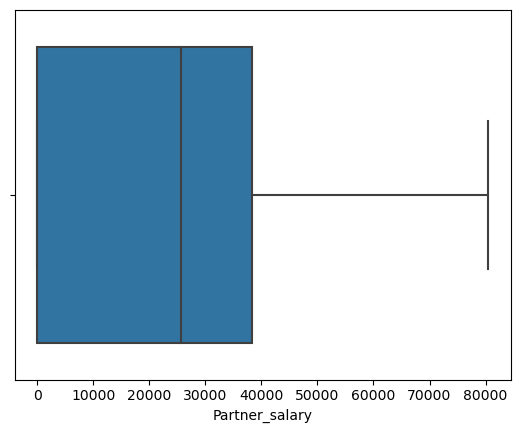

In [28]:
sns.boxplot(df_auto, x ='Partner_salary');

Since the boxplot does not show any outliers, we can replace the missing values in Partner_salary field with the mean value. 

In [29]:
# Treating the missing values in Partner_salary 
df_auto['Partner_salary'].fillna(df_auto.Partner_salary.mean(), inplace=True)
df_auto.isnull().sum()

Age                  0
Gender              53
Profession           0
Marital_status       0
Education            0
No_of_Dependents     0
Personal_loan        0
House_loan           0
Partner_working      0
Salary               0
Partner_salary       0
Total_salary         0
Price                0
Make                 0
dtype: int64

We observe that all the 106 rows of missing values in the Partner_salary field have been filled with the mean value of Partner_salary.

In [30]:
df_auto['Partner_salary'].unique()

array([70700.        , 70300.        , 60700.        , 60200.        ,
       60500.        , 50800.        , 40400.        ,     0.        ,
       70600.        , 60600.        , 60300.        , 45500.        ,
       40200.        , 40700.        ,   600.        ,   700.        ,
       27800.        , 70000.        , 40100.        , 40900.        ,
       27000.        , 20225.55932203, 40500.        , 50400.        ,
       80400.        , 60900.        , 60100.        , 70200.        ,
       30000.        , 40300.        , 40800.        , 70800.        ,
         900.        , 45000.        , 40600.        , 50700.        ,
       80500.        , 27700.        , 35800.        , 26600.        ,
       60000.        , 27900.        , 60800.        , 40000.        ,
       70100.        , 38100.        , 38200.        , 30200.        ,
       38500.        , 50900.        , 35100.        , 38700.        ,
       38300.        , 38900.        , 23200.        , 24700.        ,
      

In [31]:
df_auto.describe()


Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    20225.559322   
std       8.425978          0.943483  14674.825044    18905.183912   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    24900.000000   
75%      38.000000          3.000000  71800.000000    38000.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000

We observe that the count of Partner_salary has changed from 1475 earlier to 1581 now, as there are no missing values in this field. The standard deviation changes from 18905 to 19573. The median changes slightly from 24900 to 25600. The mean, min, 25% and max remain the same. 


# Treat Bad Data

In [32]:
#Finding the bad data in Gender column using value_counts()
df_auto['Gender'].value_counts()


Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [33]:
#replacing the 'Femal' and 'Femle' values to 'Female'
df_auto=df_auto.replace(['Femal'],'Female')
df_auto=df_auto.replace(['Femle'],'Female')
df_auto['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

We have replaced 'Femal' and 'Femle' with 'Female' field. Hence, 1 person each from Femle and Femal have been added to Female field. Now, the Female has 329 counts instead of 327 earlier. 

In [34]:
#Finding the mode of the column "Gender" as it is categorical data. 
df_auto['Gender'].mode()

0    Male
Name: Gender, dtype: object

We find that the mode of Gender column is Male. So, we can replace the missing values with the mode of Gender i.e. Male.

In [35]:
df_auto["Gender"].fillna('Male', inplace = True) 
df_auto['Gender'].isnull().sum()

0

In [36]:
df_auto.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [37]:
df_auto['Age'].value_counts().sum()

1581

In [38]:
df_auto['No_of_Dependents'].value_counts().sum()

1581

In [39]:
df_auto['Salary'].value_counts().sum()

1581

In [40]:
df_auto['Partner_salary'].value_counts().sum()

1581

In [41]:
df_auto['Total_salary'].value_counts().sum()

1581

In [42]:
df_auto['Price'].value_counts().sum()

1581

# Treating Anomalies

In [43]:
#Finding out if Partner_salary is 0 if Partner_working =No
df_pw = df_auto[(df_auto.Partner_working == 'No') & (df_auto.Partner_salary > 0)]


In [44]:
median_salary = df_auto['Partner_salary'].median()

# Use conditional logic to replace NaN values in partner_salary
df_auto['Partner_salary'] = df_auto.apply(
    lambda row: median_salary if pd.isna(row['Partner_salary']) and row['Partner_working'] == 'Yes' else 0 if pd.isna(row['Partner_salary']) and row['Partner_working'] == 'No' else row['Partner_salary'],
    axis=1
)

# Data Preprocessing Observations

In this way, we have treated the bad data, missing values and checked for any anomalies. 
The missing values in Gender has been replaced with the mode value of Gender, which is Male. 
The spelling mistakes in the Gender column like Femle or Femal have been replaced with the mode value of Gender.
The Partner_salary column had 106 missing values too. I replaced the missing values of Partner_salary field with the mean value of the field.
Thus, the data has been cleaned now and is ready for visualisation.

# 2.0 DATA VISUALISATION

# 2.1 Univariate Analysis

# 2.1.1 Numerical Data

In [45]:
# a),b) Analysis of Age and No. of Dependents
df_auto[['Age','No_of_Dependents']].describe()

Age  No_of_Dependents
count  1581.000000       1581.000000
mean     31.922201          2.457938
std       8.425978          0.943483
min      22.000000          0.000000
25%      25.000000          2.000000
50%      29.000000          2.000000
75%      38.000000          3.000000
max      54.000000          4.000000

Insights:
Age ranges from 22 years to 54 years. 75% of the people are of age 38 years.
The number of dependents ranges from 0 to a maximum of 4.
Mean age is 32 years which is higher than the median value of 29 years, so the distribution is right skewed.
Mean and Median of No of dependents is almost same, hence the distribution is normally distributed.

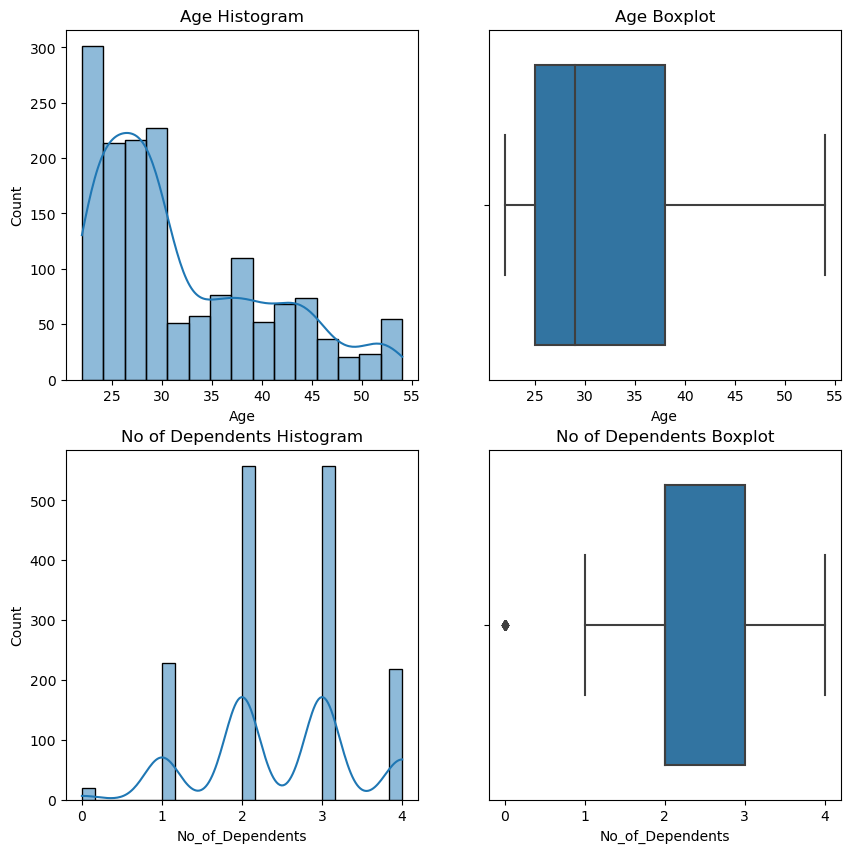

In [46]:
# Histogram and Boxplot for Age and No. of Dependents

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
a=sns.histplot(df_auto['Age'], kde=True, ax=axes[0][0])
a.set_title("Age Histogram", fontsize=12)
b=sns.boxplot(x='Age', data=df_auto, ax=axes[0][1])
b.set_title("Age Boxplot", fontsize=12)
c=sns.histplot(df_auto['No_of_Dependents'] , kde=True, ax=axes[1][0])
c.set_title("No of Dependents Histogram", fontsize=12)
d=sns.boxplot(x='No_of_Dependents', data=df_auto , ax=axes[1][1])
d.set_title("No of Dependents Boxplot", fontsize=12)
plt.show()

Insights:
As seen from the histogram and the box plot, Age distribution is right skewed.
The No of Dependents distribution is normally distributed but there is an outlier.  

In [47]:
# c) Analysis of Salary and Partner_Salary

df_auto[['Salary','Partner_salary']].describe()

Salary  Partner_salary
count   1581.000000     1581.000000
mean   60392.220114    20225.559322
std    14674.825044    18905.183912
min    30000.000000        0.000000
25%    51900.000000        0.000000
50%    59500.000000    24900.000000
75%    71800.000000    38000.000000
max    99300.000000    80500.000000

# Insights

* The Salary field ranges from a minimum of 30000 to a maximum of 99300. 
* 75% of the people have a salary of 71800.
* The mean salary is greater than the median salary , indicating a right skewed distribution.
* Partner salary has a minimum and maximum of 0 and 80500 respectively.
* The mean value of Partner salary is 20225 and a median value of 24900. As median is higher than mean, it indicates a left skewed distribution.
* 75% of the people have a partner salary of 38000.


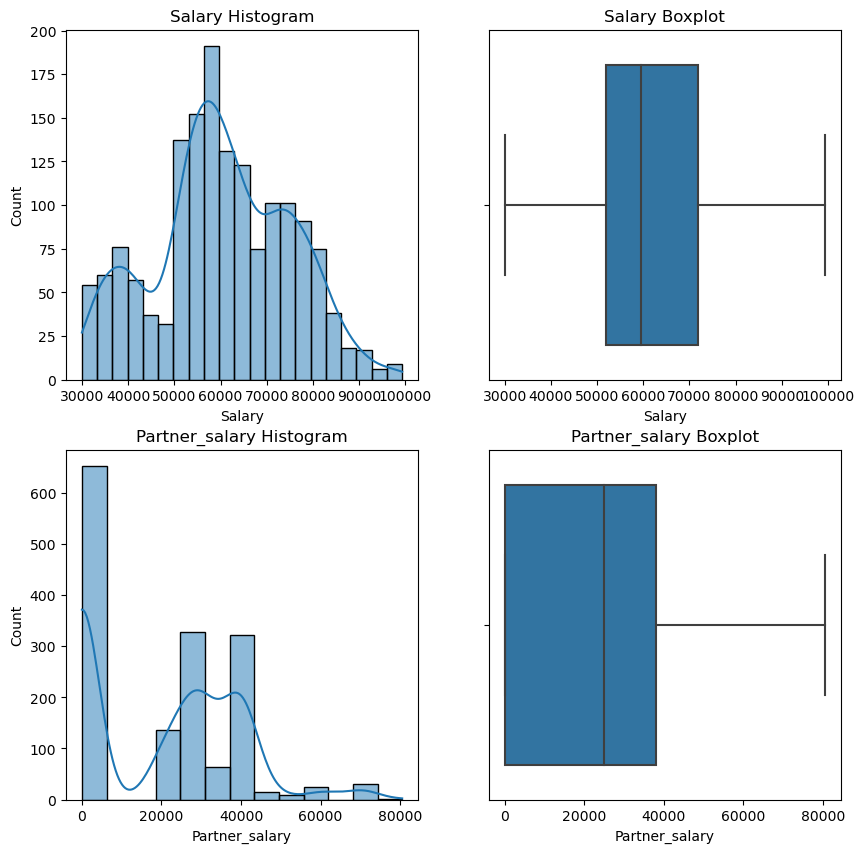

In [48]:
# Histogram and Boxplot for Salary and Partner_salary

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
a=sns.histplot(df_auto['Salary'], kde=True, ax=axes[0][0])
a.set_title("Salary Histogram", fontsize=12)
b=sns.boxplot(x='Salary', data=df_auto, ax=axes[0][1])
b.set_title("Salary Boxplot", fontsize=12)
c=sns.histplot(df_auto['Partner_salary'] , kde=True, ax=axes[1][0])
c.set_title("Partner_salary Histogram", fontsize=12)
d=sns.boxplot(x='Partner_salary', data=df_auto , ax=axes[1][1])
d.set_title("Partner_salary Boxplot", fontsize=12)
plt.show()

# Insights

* Salary field seems to be normally distributed with no outliers.
* Partner salary has the minimum and 25% starting at 0, hence there are no left whiskers. No outliers too.

In [49]:
# d) Analysis of Total_salary

df_auto['Total_salary'].describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

Insights:
* The minimum salary is 30000 while the maximum salary is 171000.
* The median salary is 78000, while the mean is 79625. 
* Both mean and median values are almost the same, hence looks to be normally distributed.
* The maximum salary is way higher than the 75% value, indicating outliers.

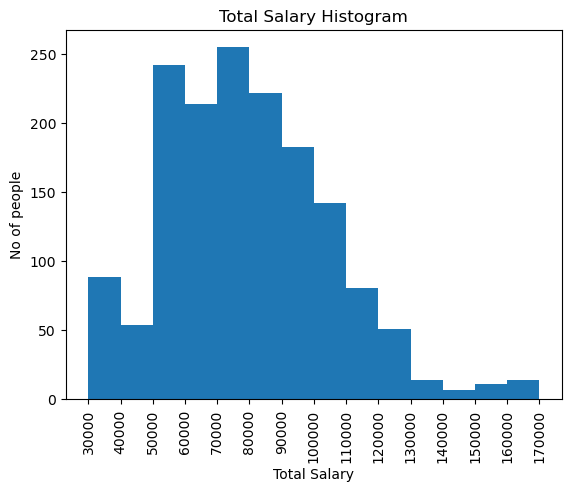

In [50]:
# Histogram and Boxplot for Total_salary

counts, edges, bins = plt.hist(df_auto['Total_salary'], bins = range(30000,180000,10000));
plt.xticks(range(30000,180000,10000),rotation=90);
plt.title('Total Salary Histogram');
plt.xlabel('Total Salary');
plt.ylabel('No of people');

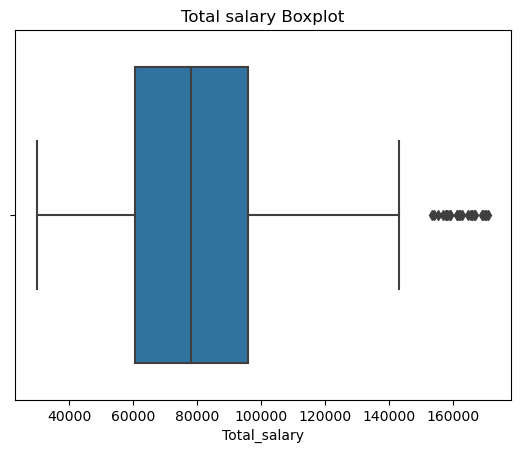

In [51]:
sns.boxplot(data=df_auto, x='Total_salary');
plt.title('Total salary Boxplot');

# Insights

The boxplot clearly shows the presence of outliers in the upper range. 


In [52]:
# e) Analysis of Price
df_auto['Price'].describe()

count     1581.000000
mean     35597.722960
std      13633.636545
min      18000.000000
25%      25000.000000
50%      31000.000000
75%      47000.000000
max      70000.000000
Name: Price, dtype: float64

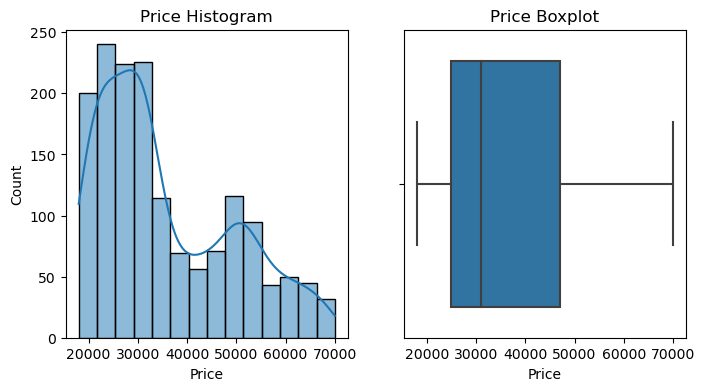

In [53]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8,4))
a=sns.histplot(df_auto['Price'], kde=True, ax=axes[0])
a.set_title("Price Histogram", fontsize=12)
b=sns.boxplot(x='Price', data=df_auto, ax=axes[1])
b.set_title("Price Boxplot", fontsize=12)

plt.show()

# Insights
* Since Mean is greater than Median, the distribution is right-skewed as seen in the countplot as well as the boxplot.
* The price of cars ranges from a minimum of 18000 to a maximum of 70000.
* There are no outliers.


# 2.1.2 Treating outliers

In [54]:
# Treating outliers in No_of_Dependents

Q1 = np.percentile(df_auto['No_of_Dependents'], 25, method='midpoint')
Q3 = np.percentile(df_auto['No_of_Dependents'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_auto['No_of_Dependents']>=upper)[0]
lower_array = np.where(df_auto['No_of_Dependents']<=lower)[0]
 
# Removing the outliers
df_auto.drop(index=upper_array, inplace=True)
df_auto.drop(index=lower_array, inplace=True)
 

1.0


<Axes: xlabel='No_of_Dependents'>

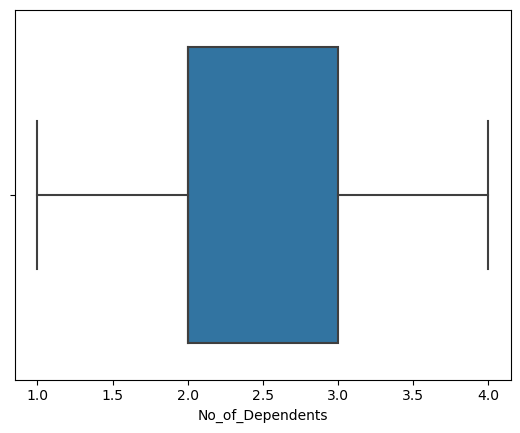

In [55]:
sns.boxplot(x='No_of_Dependents', data=df_auto)

We see from the boxplot that the outlier in the No_of_Dependents field has been removed.

# 2.1.3 Categorical data

In [56]:
# a) Gender
df_auto['Gender'].value_counts(normalize=True)
 

Male      0.79116
Female    0.20884
Name: Gender, dtype: float64

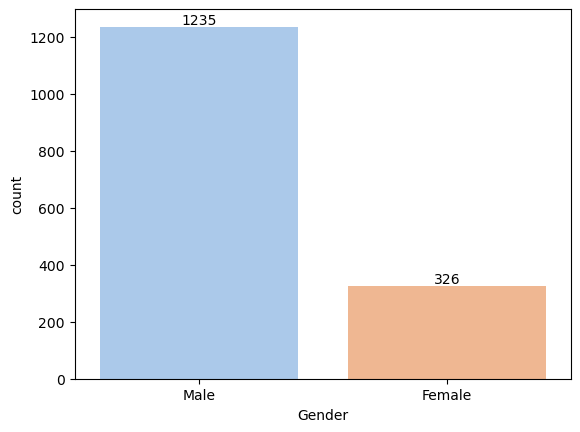

In [57]:
splot = sns.countplot(df_auto, x='Gender', order=df_auto['Gender'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);

* About 79% of the people are males who buy a car while 20.8% of the people are females who buy a car.
* In numbers, 1252 people who buy a car are males while 329 are females.

In [58]:
# b) Profession
df_auto['Profession'].value_counts(normalize=True)

Salaried    0.567585
Business    0.432415
Name: Profession, dtype: float64

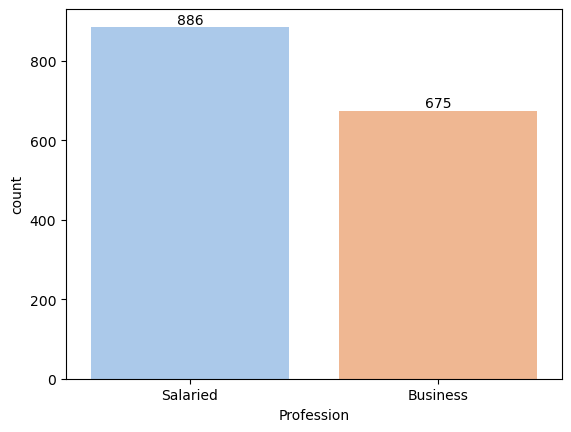

In [59]:
splot = sns.countplot(df_auto, x='Profession', order=df_auto['Profession'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);


# Insights

* Clearly, salaried professionals are more than business people who prefer to buy a car.
* 56.6% of the people who buy a car are salaried employees, while 43.3% of the people are from the business class.
* 896 people who buy a car are salaried while 685 are from business class.

In [60]:
# c) Marital_status
df_auto['Marital_status'].value_counts(normalize=True)

Married    0.924407
Single     0.075593
Name: Marital_status, dtype: float64

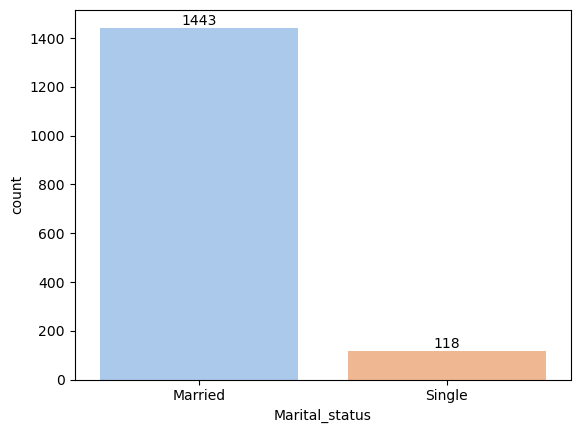

In [61]:
splot = sns.countplot(df_auto, x='Marital_status', order=df_auto['Marital_status'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);

# Insights

Married people outweigh single unmarried people who buy a car. 91.2% (1443 out of 1581) of the people who buy a car are married while 8% (138)are single.

In [62]:
# d) Education
df_auto['Education'].value_counts(normalize=True)

Post Graduate    0.622678
Graduate         0.377322
Name: Education, dtype: float64

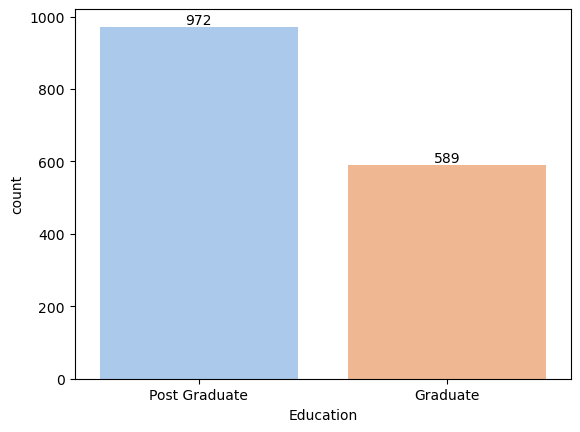

In [63]:
splot = sns.countplot(df_auto, x='Education', order=df_auto['Education'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);


# Insights

62.3% of the people who buy a car are post graduates while 37.7% are only graduates.
985 post graduates buy a car while 596 graduates buy a car.

In [64]:
# e) Personal_loan
df_auto['Personal_loan'].value_counts(normalize=True)

No     0.501602
Yes    0.498398
Name: Personal_loan, dtype: float64

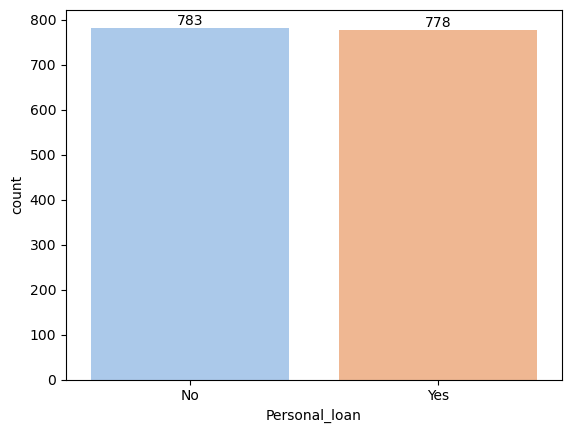

In [65]:
splot = sns.countplot(df_auto, x='Personal_loan', order=df_auto['Personal_loan'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);

# Insights

The percentage of people who take personal loan and who do not take personal loan to buy a car is almost the same, that is, 792 people who have taken personal loan buy a car and 789 who do not take personal loan also buy a car. It is almost 50% for both. 

In [66]:
# f) House loan
df_auto['House_loan'].value_counts(normalize=True)

No     0.66688
Yes    0.33312
Name: House_loan, dtype: float64

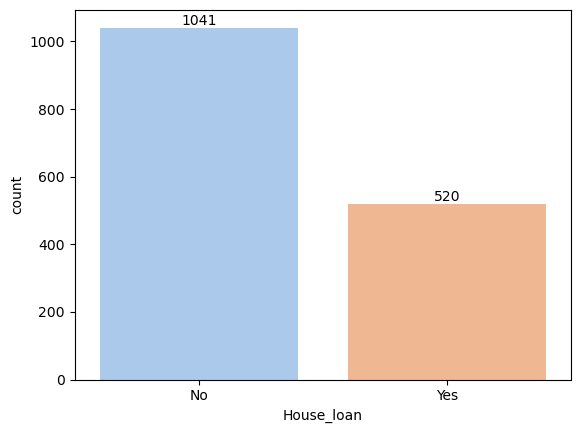

In [67]:
splot = sns.countplot(df_auto, x='House_loan', order=df_auto['House_loan'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);

# Insights
The graph shows that 66.6% (1054 in number) of the people who buy cars do not have house loans while 33.3% (527) have house loans. 

In [68]:
# g) Partner_working
df_auto['Partner_working'].value_counts(normalize=True)

Yes    0.556054
No     0.443946
Name: Partner_working, dtype: float64

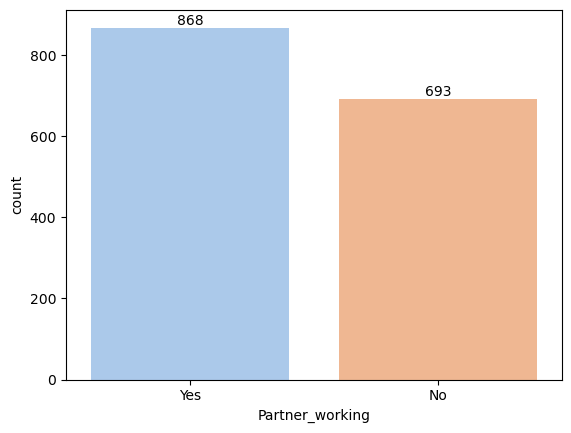

In [69]:
splot = sns.countplot(df_auto, x='Partner_working', order=df_auto['Partner_working'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);

# Insights
The graph clearly shows that among the people who buy cars, 55% of the people have working partners while 45% have non-working partners. Or, 868 people who buy a car have working partners while 713 have partners who are not working. 

In [70]:
# h) Make
df_auto['Make'].value_counts(normalize=True)

Sedan        0.449712
Hatchback    0.363229
SUV          0.187060
Name: Make, dtype: float64

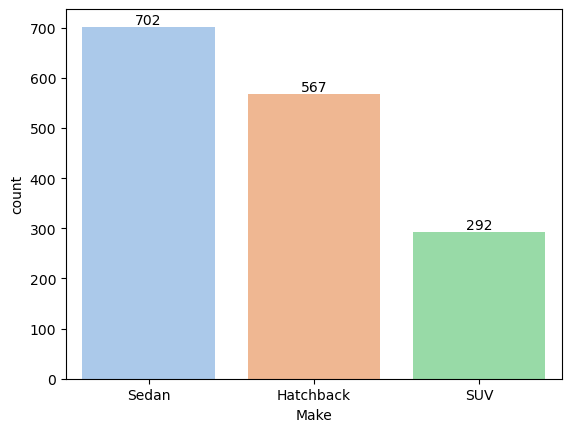

In [71]:
splot = sns.countplot(df_auto, x='Make', order=df_auto['Make'].value_counts().index, palette='pastel')
plt.bar_label(splot.containers[0]);

# Insights
44.4% of the people who buy a car prefer Sedan, 36.8% Hatchback while 18.7% SUV. People prefar Sedan more than hatchback or an SUV. 
702 people prefer sedan, 582 prefer Hatchback while 297 prefer SUV.

# 2.2 Bivariate Analysis

# 2.2.1 Numeric vs Numeric

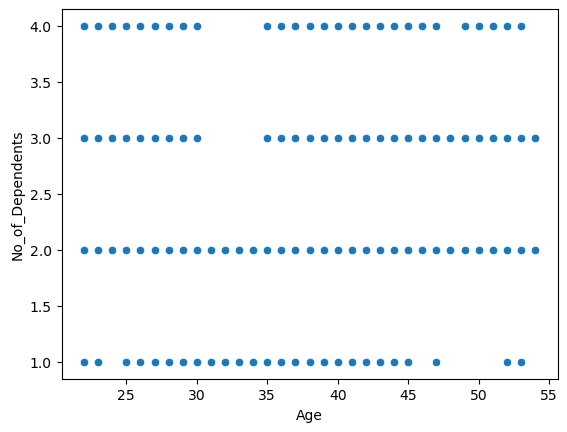

In [72]:
# a) Age vs No_of_Dependents
sns.scatterplot(x='Age', y='No_of_Dependents', data=df_auto);

# Insights
There is no correlation between Age and No_of_Dependents as the dots are all scattered all over.

Text(0, 0.5, 'Salary')

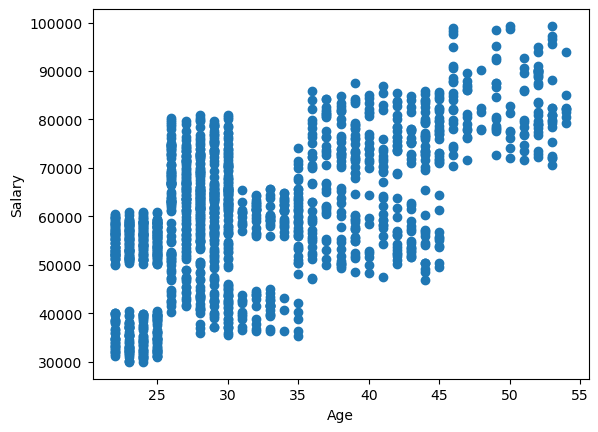

In [73]:
# b) Age vs Salary
plt.scatter(df_auto['Age'],df_auto['Salary'])
plt.xlabel('Age')
plt.ylabel("Salary")

# Insights
There seems to be a positive correlation between Age and Salary. As Age increases, Salary also increases.

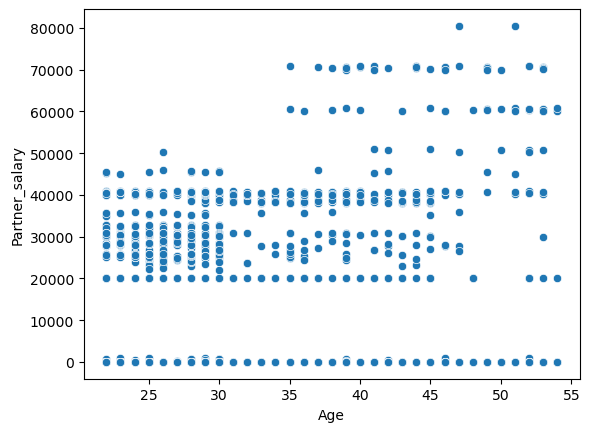

In [74]:
# c) Age vs Partner_salary
sns.scatterplot(x='Age', y='Partner_salary', data=df_auto);

# Insights
There is no correlation between Age and Partner_salary.

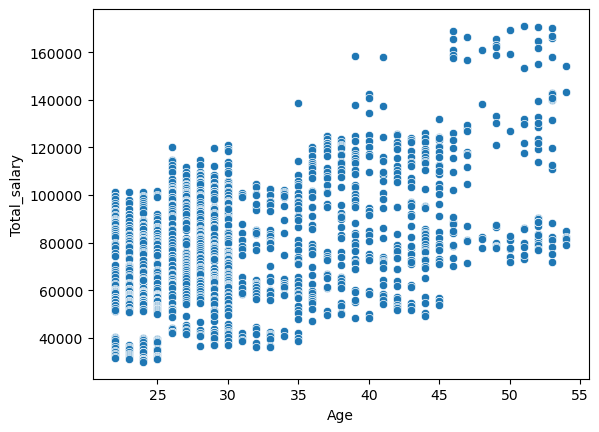

In [75]:
# d) Age vs Total_salary
sns.scatterplot(x='Age', y='Total_salary', data=df_auto);

# Insights
We can see a positive correlation between Age and Total Salary. As Age increases, the total salary also increases linearly.

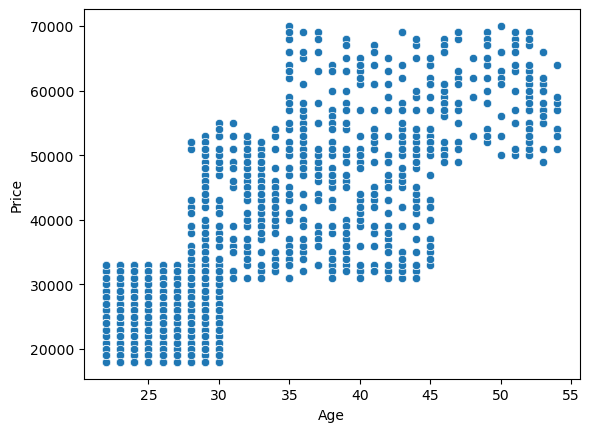

In [76]:
# e) Age vs Price
sns.scatterplot(x='Age', y='Price', data=df_auto);

# Insights
There is a positive correlation between Age and Price. As Age increases, they prefer cars of higher prices.

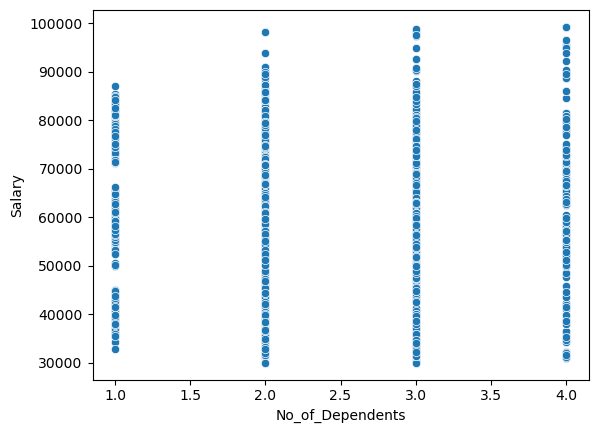

In [77]:
# No_of_Dependents vs Salary
sns.scatterplot(x='No_of_Dependents', y='Salary', data=df_auto);

# Insights
There is no correlation between No of Dependents and Salary.

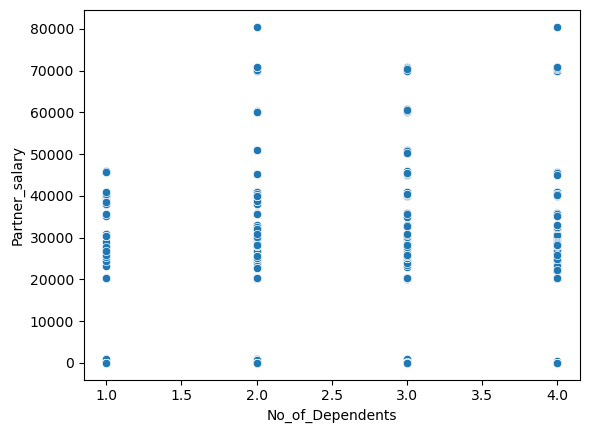

In [78]:
# No_of_Dependents vs Partner_salary
sns.scatterplot(x='No_of_Dependents', y='Partner_salary', data=df_auto);

# Insights
There is no correlation between No of Dependents and Partner Salary.

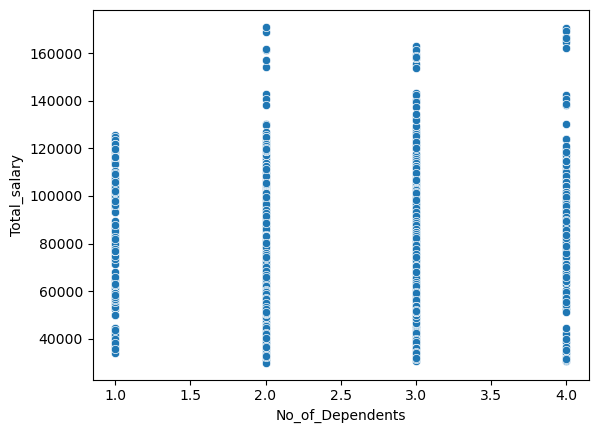

In [79]:
# No_of_Dependents vs Total_salary
sns.scatterplot(x='No_of_Dependents', y='Total_salary', data=df_auto);

# Insights
There is no correlation between No of Dependents and Total Salary.

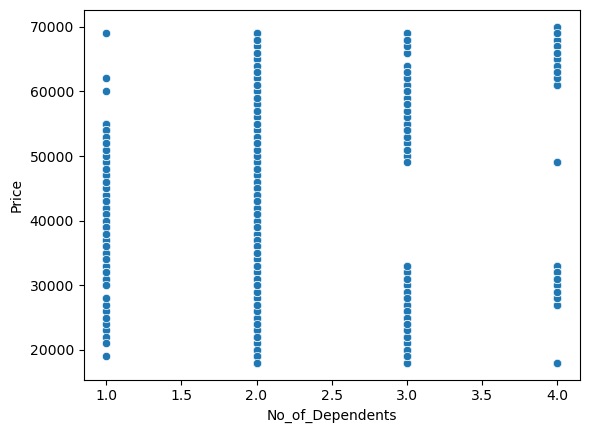

In [80]:
# No_of_Dependents vs Price
sns.scatterplot(x='No_of_Dependents', y='Price', data=df_auto);

# Insights
There is no correlation between No of Dependents and Price.

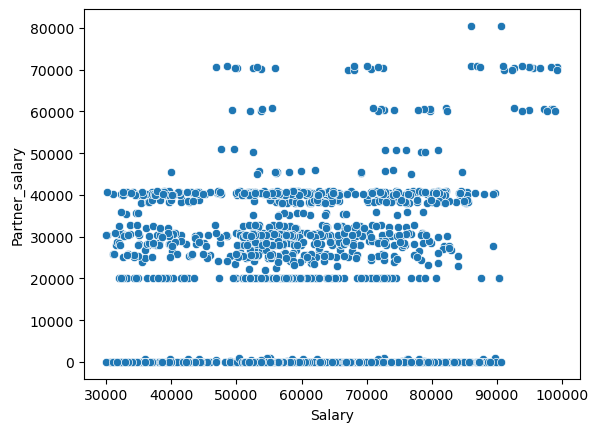

In [81]:
# Salary vs Partner_salary
sns.scatterplot(x='Salary', y='Partner_salary', data=df_auto);

# Insights
There is no correlation between Salary and Partner Salary.

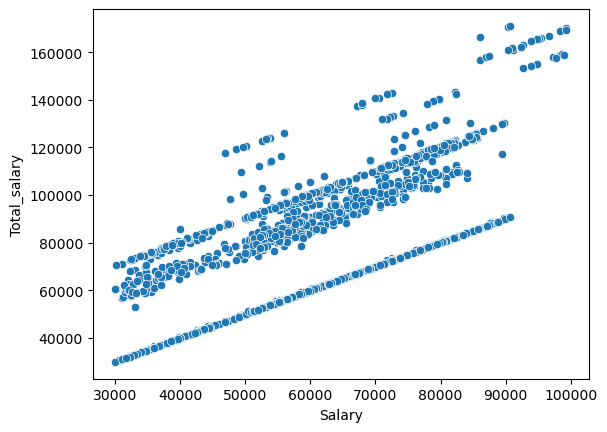

In [82]:
# f) Salary vs Total_salary
sns.scatterplot(x='Salary', y='Total_salary', data=df_auto);

# Insights
There is a positive correlation between Salary and Total Salary. As salary increases, the total salary also increases.

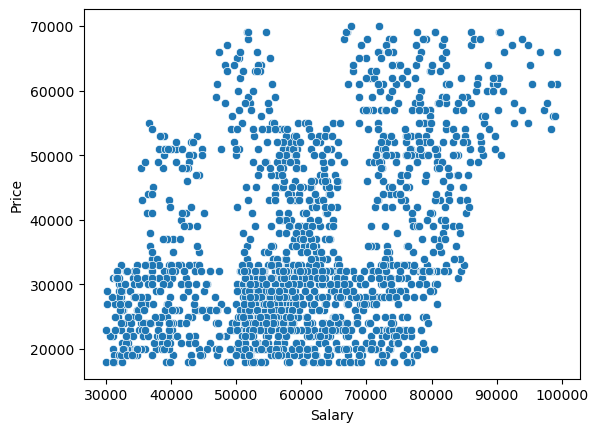

In [83]:
# g) Salary vs Price
sns.scatterplot(x='Salary', y='Price', data=df_auto);

# Insights
There is some correlation between Salary and Price. We can see that as Salary increases, Somewhat higher price of cars are preferred.

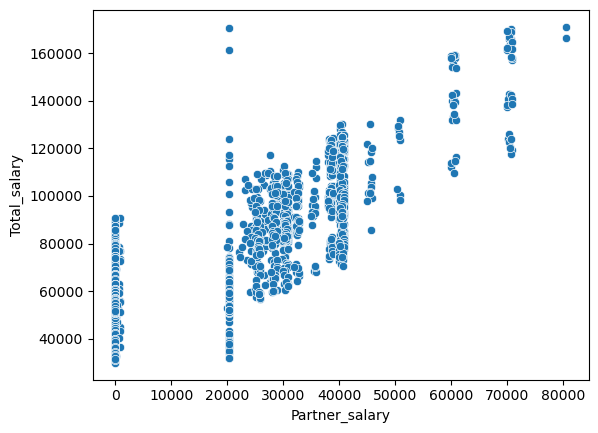

In [84]:
# Partner_salary vs Total_salary
sns.scatterplot(x='Partner_salary', y='Total_salary', data=df_auto);

# Insights
There is a positive correlation between Partner salary and Total salary. As Partner salary increases, Total salary also increases.

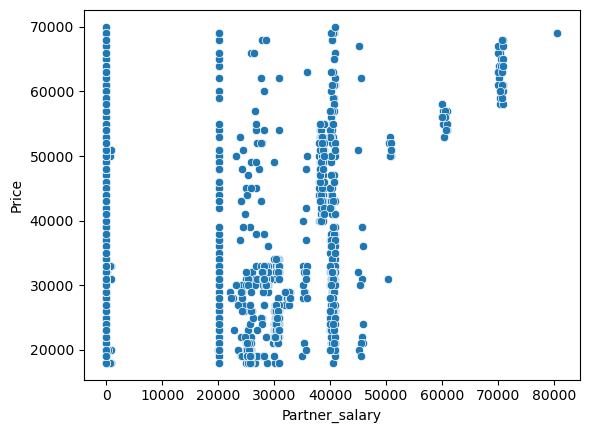

In [85]:
# Partner_salary vs Price
sns.scatterplot(x='Partner_salary', y='Price', data=df_auto);

# Insights
There is no correlation between Partner salary and Price.

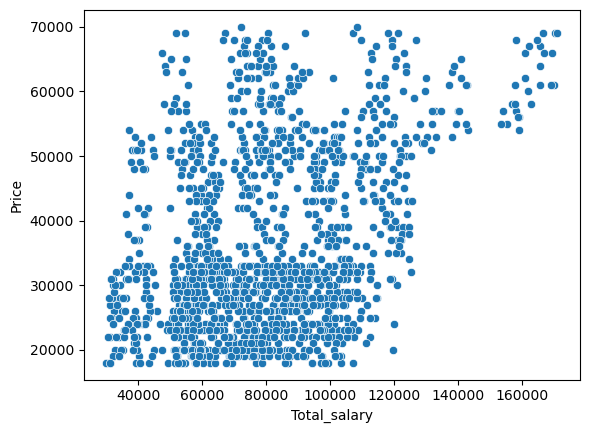

In [86]:
# Total_salary vs Price
sns.scatterplot(x='Total_salary', y='Price', data=df_auto);

# Insights
There is a positive correlation between Total salary and Price. As Total salary increases, the price of cars preferred also goes higher.

# 2.2.2 Pairplot for Numerical vs Numerical data

<Figure size 1000x800 with 0 Axes>

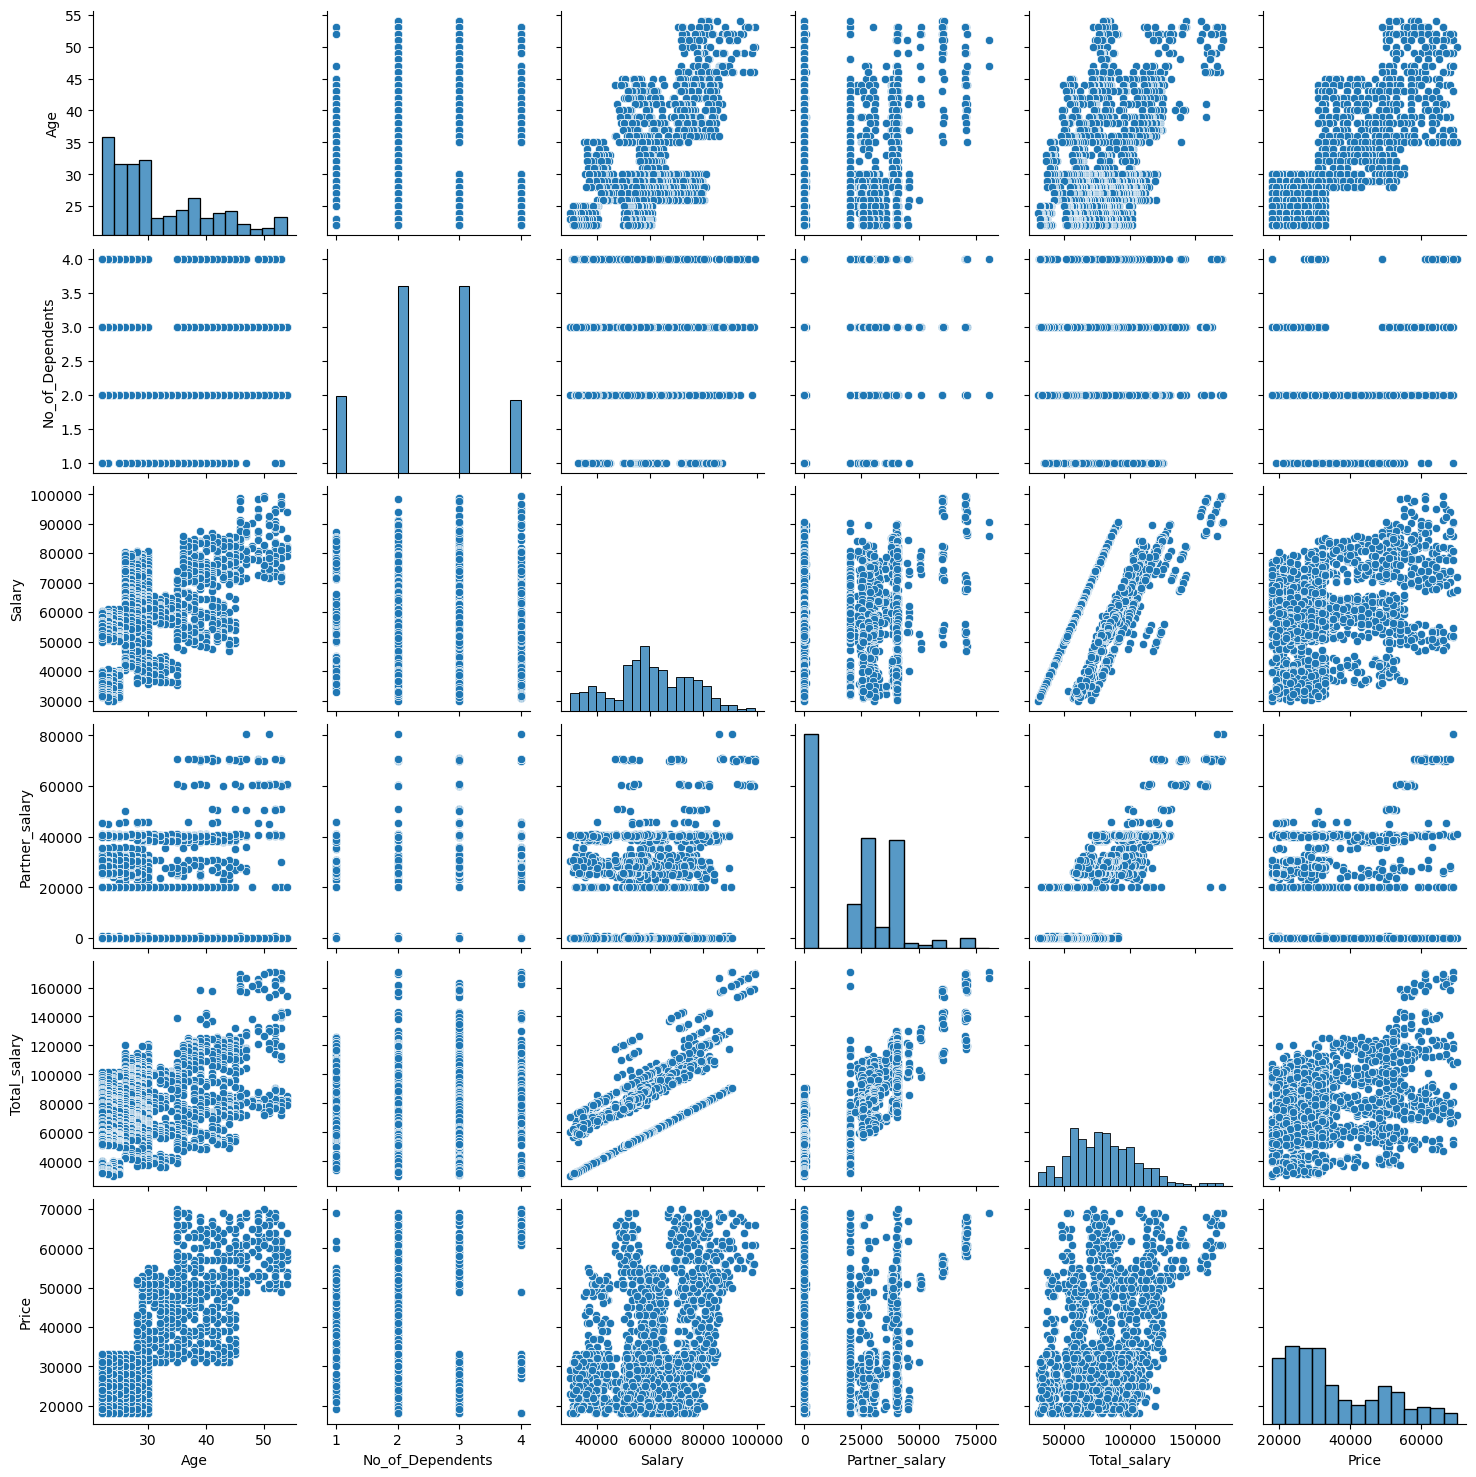

In [87]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_auto[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']]);
corner=True

# Insights of Numerical vs Numerical

From the above scatterplots, we can see that there is a positive correlation between:
* Age and Price
* Age and Total_salary fields
* Age and Salary
* Salary and Total_salary
* Partner_salary and Total_salary
* Price and Total_salary
* Price and Salary
* Price and Age

As one increases, the other also increases indicating positive correlation.
There is no correlation between all the other fields.

# 2.2.3 Correlation between all numerical variables

C:\Users\ramas\AppData\Local\Temp\ipykernel_27928\3998250270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_auto.corr(), annot=True, fmt=".2f");


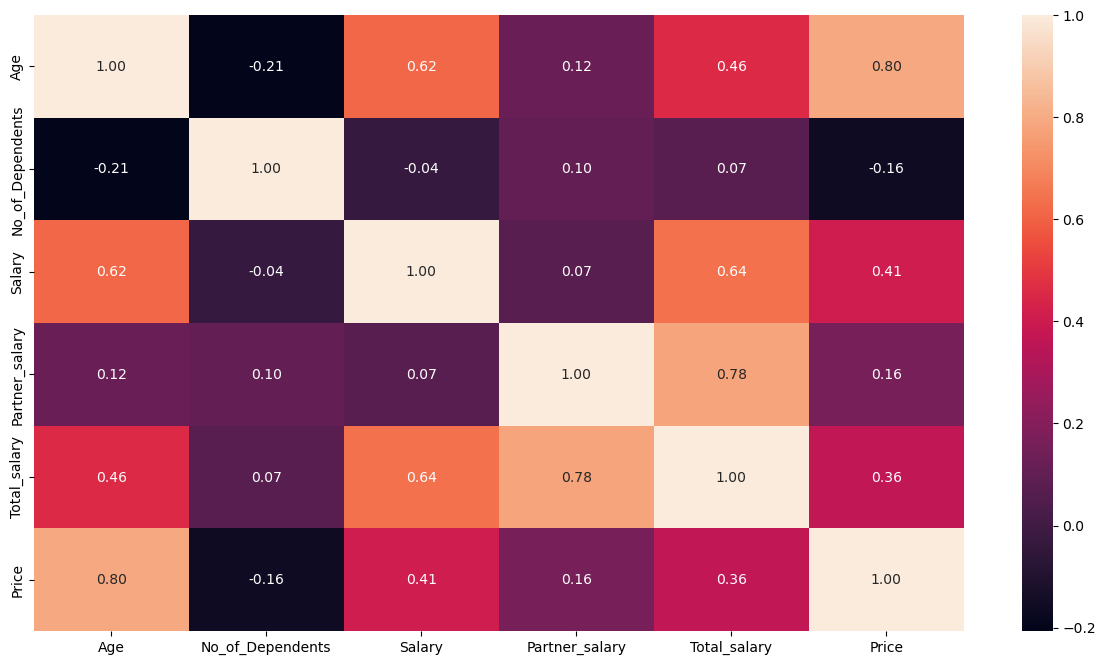

In [88]:
plt.figure(figsize=(15,8))
sns.heatmap(df_auto.corr(), annot=True, fmt=".2f");

# Insights
From the heatmap, it is clearly seen that Age and Price fields are very highly correlated.

It is also observed that there is a positive correlation between:
Age and Total_salary
Age and Salary
Salary and Total_salary
Partner_salary and Total_salary



# 2.2.4 Categorical vs Numerical

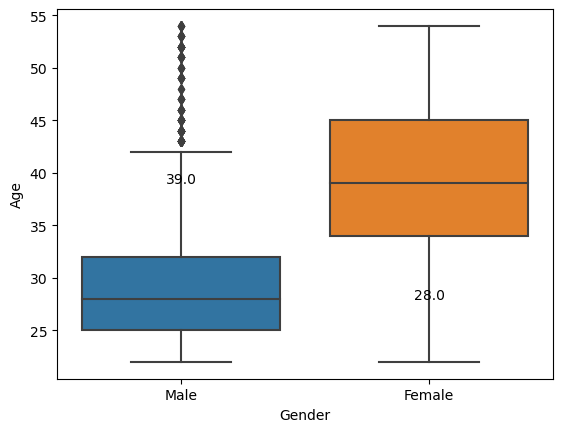

In [89]:
# Gender vs Age
box=sns.boxplot(x='Gender', y='Age', data=df_auto)
medians=df_auto.groupby(['Gender'])['Age'].median()
for i in range(len(medians)):
    box.annotate(str(medians[i]),xy=(i,medians[i]),horizontalalignment='center');

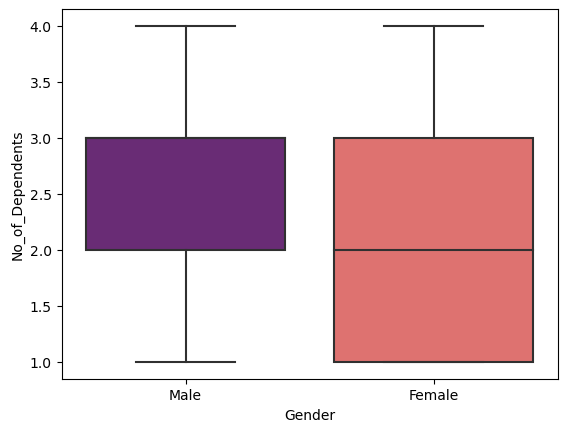

In [90]:
# Gender vs No of dependents
fig_dims=(5,3)
sns.boxplot(x='Gender', y='No_of_Dependents', data=df_auto, palette='magma');

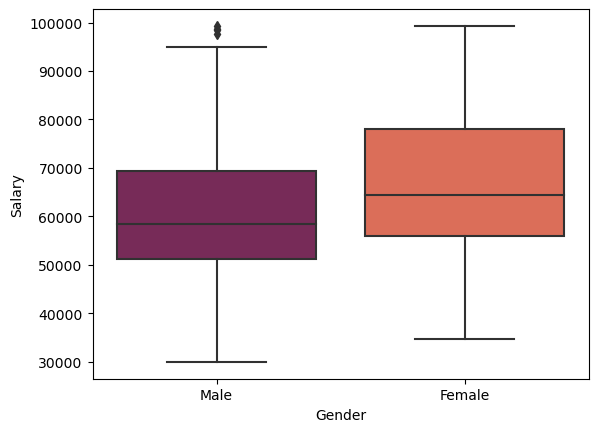

In [91]:
# Gender vs Salary
fig_dims=(12,5)
sns.boxplot(x='Gender', y='Salary', data=df_auto, palette='rocket');

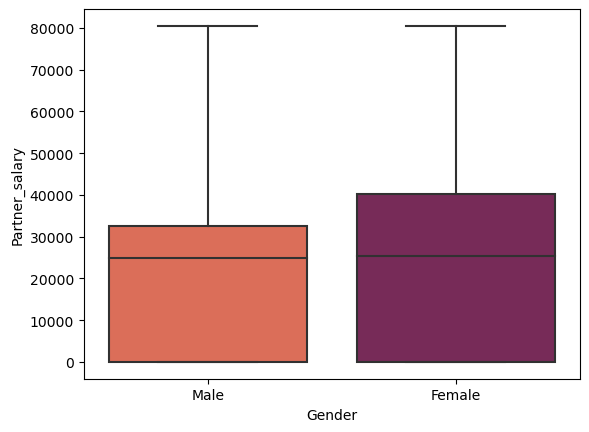

In [92]:
# Gender vs Partner_salary
fig_dims=(12,5)
sns.boxplot(x='Gender', y='Partner_salary', data=df_auto, palette='rocket_r');

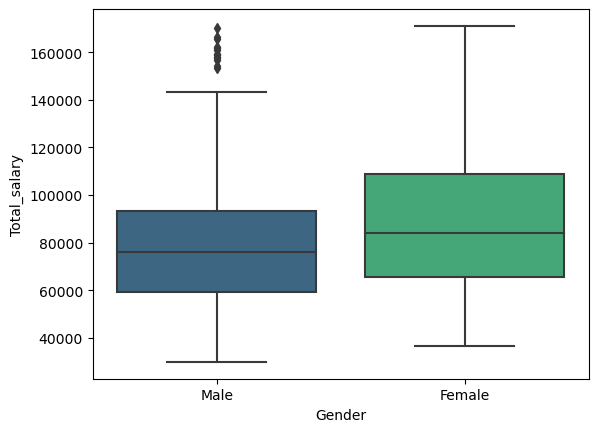

In [93]:
# Gender vs Total_salary
fig_dims=(12,5)
sns.boxplot(x='Gender', y='Total_salary', data=df_auto, palette='viridis');

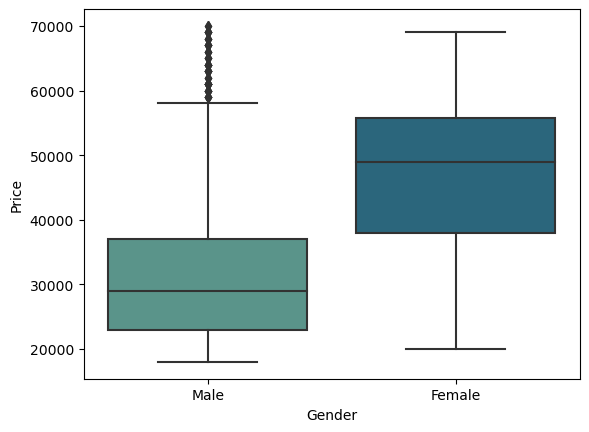

In [94]:
# Gender vs Price
fig_dims=(12,5)
sns.boxplot(x='Gender', y='Price', data=df_auto, palette='crest');

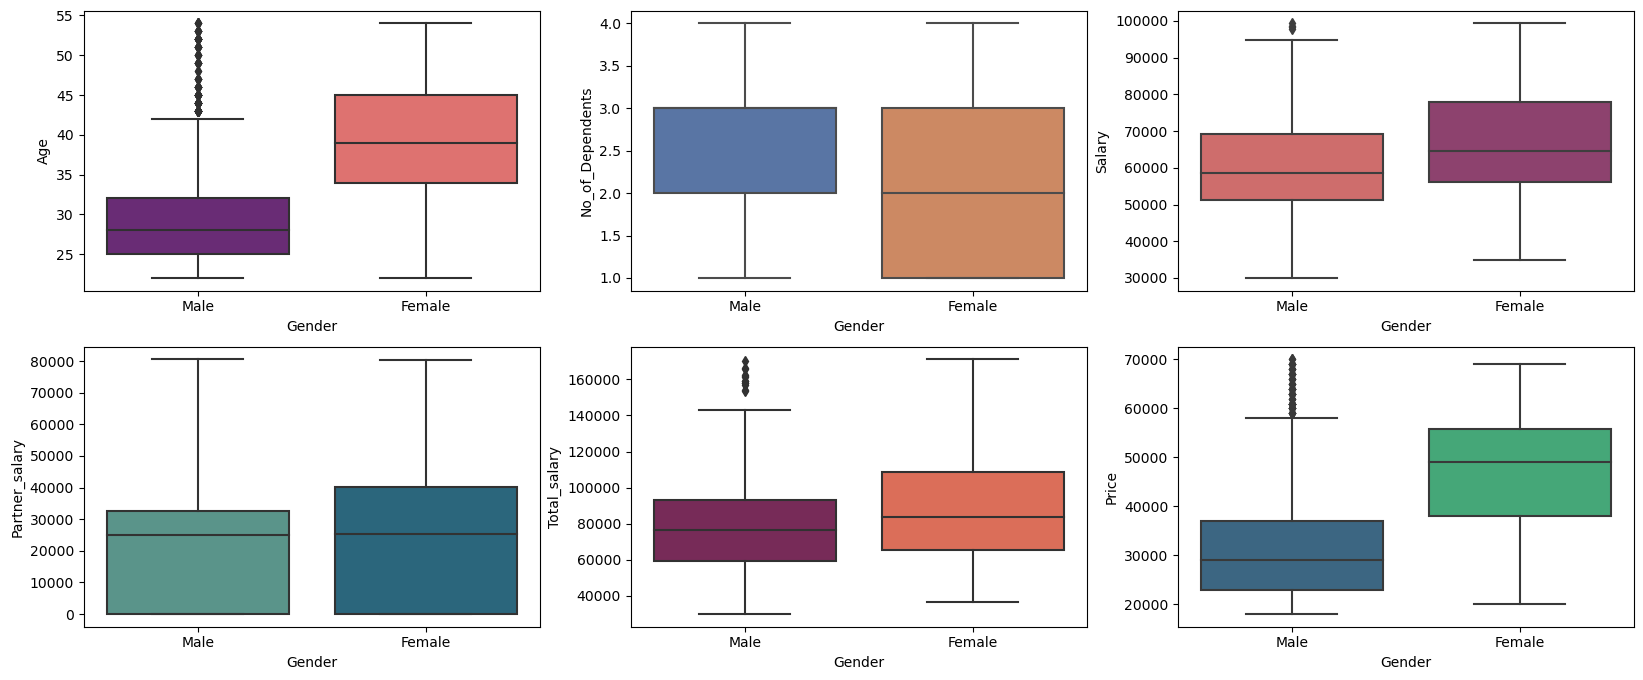

In [95]:
# a) BOX PLOTS OF Gender VS all numerical variables

fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Gender', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='Gender', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Gender', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='Gender', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Gender', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='Gender', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights
Gender vs Age: 
    * The median value of Males who buy a car is much lesser than the median value of females who buy a car. 
    * The age of males who buy a car ranges from 22 years to 43 years while that of females, it ranges from 22 years to 54 years.    * There are outliers when it comes to males who buy a car. There are quite a few males who are more than the upper limit of 42 years who buy a car.
    * The males age group have large number of outliers.
    * Females have more variability as compared to males.
    * The age distribution of males is right skewed.
    
Gender vs No_of_Dependents: 
    * The range of female number of dependents is much more than the male dependents. 
    * The maximum age of male and female dependents is the same.
    * The female dependents show more variability than males. 
    * There is one low outlier in the male dependents.
    
Gender vs Salary:
    * The median salary of females buying a car is slightly more than the median salary of males.
    * There is a high outlier in the salary of male.

Gender vs Partner_salary:
    * The median Partner_salary of male and female is the same.
    * The minimum and maximum of both male and female partner_salary is the same.

Gender vs Total_salary
    * The maximum value of female total salary is much more than male. 
    * The median total salary of female is more than that of males.
    * The range of female total salary is more than that of males.
    * There are high outliers in total salary of males.

Gender vs Price
    * The median price is much higher for females as compared to males.
    * The maximum price of cars that females buy is much higher than that of males.
    * There are high outliers in prices for males.
    

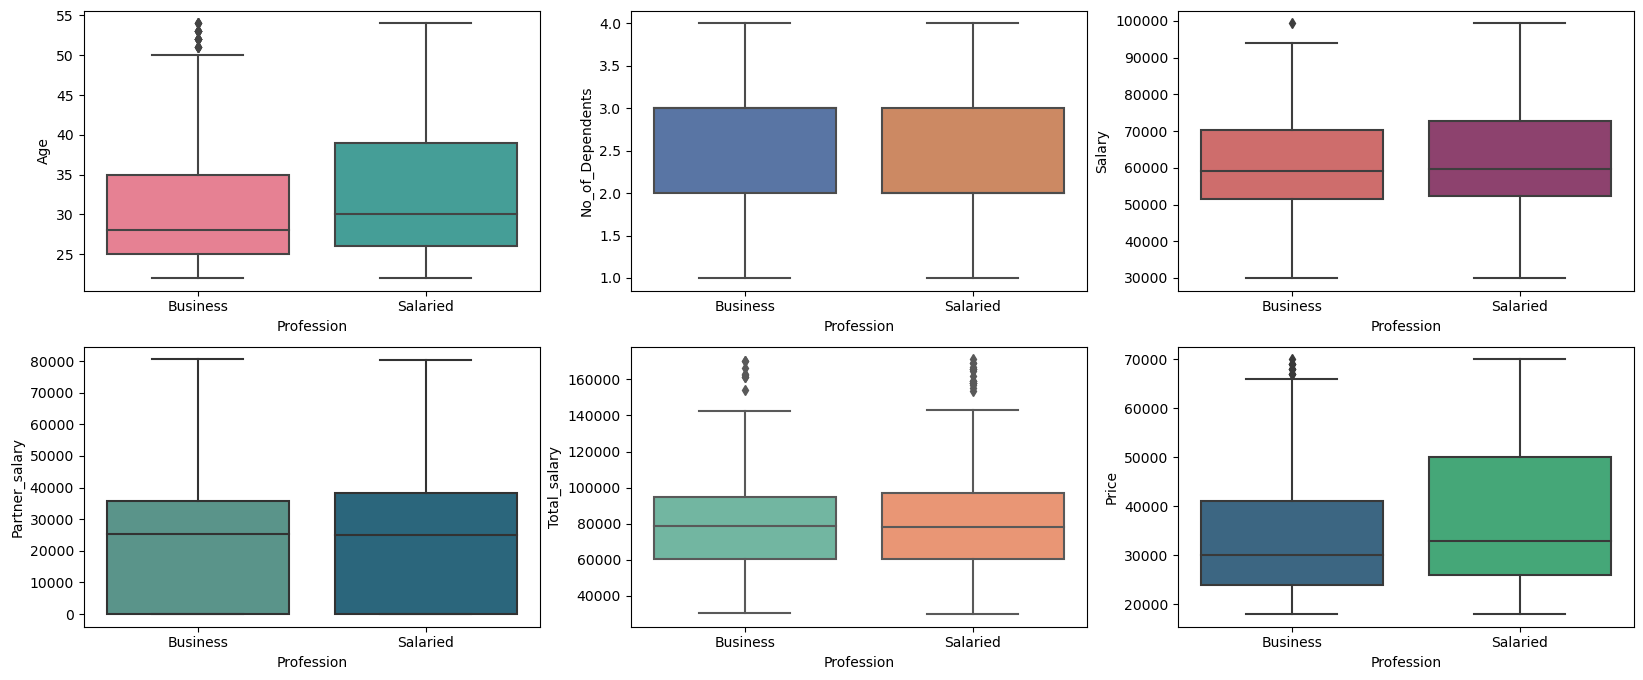

In [96]:
# b) Boxplot for 'Profession' Vs all numerical variables

fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Profession', y='Age', data=df_auto, palette='husl',ax=axs[0][0]);
sns.boxplot(x='Profession', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Profession', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='Profession', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Profession', y='Total_salary', data=df_auto, palette='Set2',ax=axs[1][1]);
sns.boxplot(x='Profession', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights

Profession vs Age: The salaried people's ages are right skewed. The business median age is around 27 and have outliers of 50+ age.

Profession vs Salary: The variation of salaried customers is higher. The median salary looks similar. Business customers having outliers in salary. 


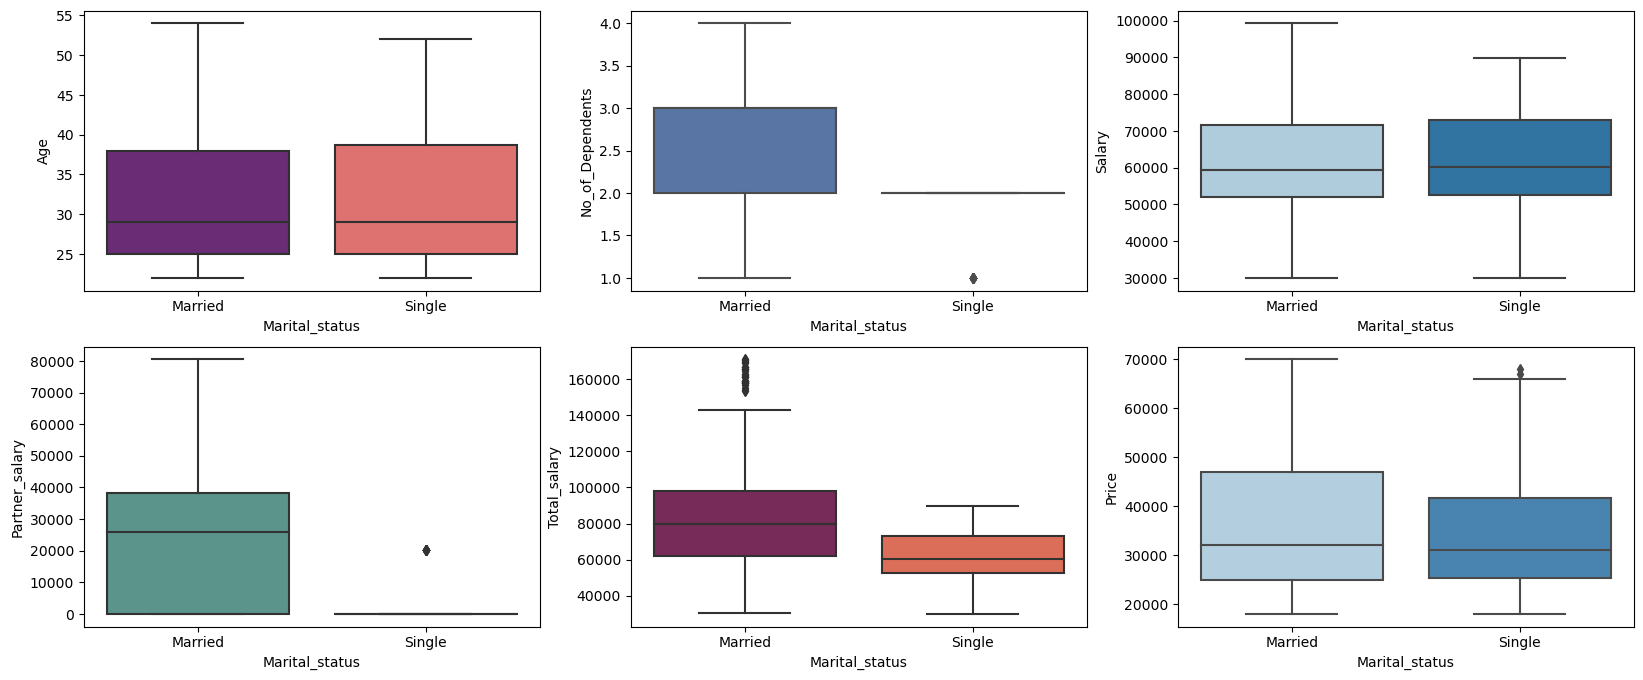

In [97]:
# c) Boxplots for 'Marital_status' Vs all numerical variables
fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Marital_status', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='Marital_status', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Marital_status', y='Salary', data=df_auto, palette='Paired',ax=axs[0][2]);
sns.boxplot(x='Marital_status', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Marital_status', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='Marital_status', y='Price', data=df_auto, palette='Blues',ax=axs[1][2]);

# Insights

Marital_status vs Total_salary: The married people have slightly higher median salary as compared to single people. Also, the maximum salary is higher in case of married.

Marital_status vs Partner_salary: It is very clearly seen from the boxplot that single people do not have partner salary, which is obvious.


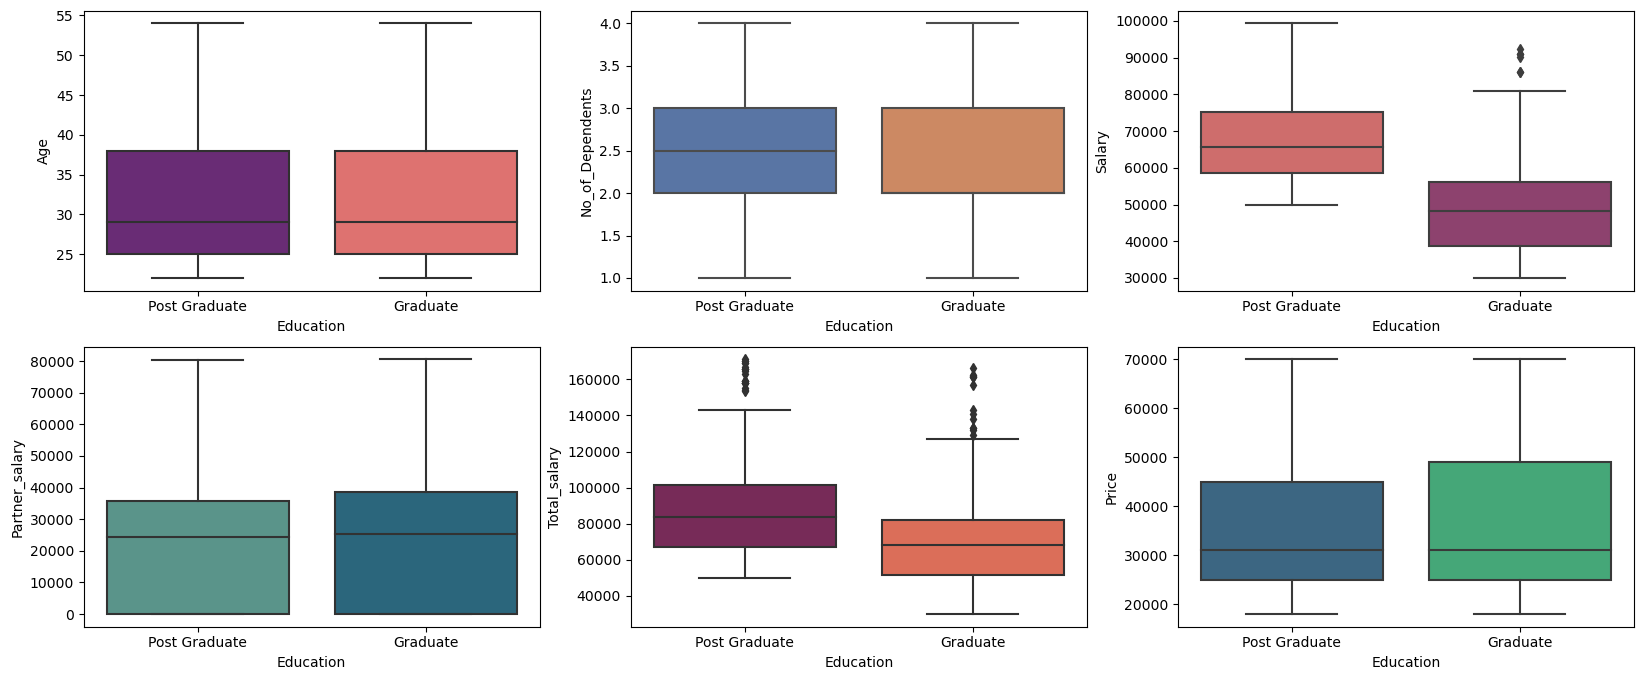

In [98]:
# d) Boxplots of 'Education' Vs all numerical variables
fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Education', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='Education', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Education', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='Education', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Education', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='Education', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights

Education vs Salary: The boxplot shows post graduates getting much higher median salary as compared to graduates.
Education vs Age: The median age, minimum and maximum age of graduates and post graduates is almost the same.


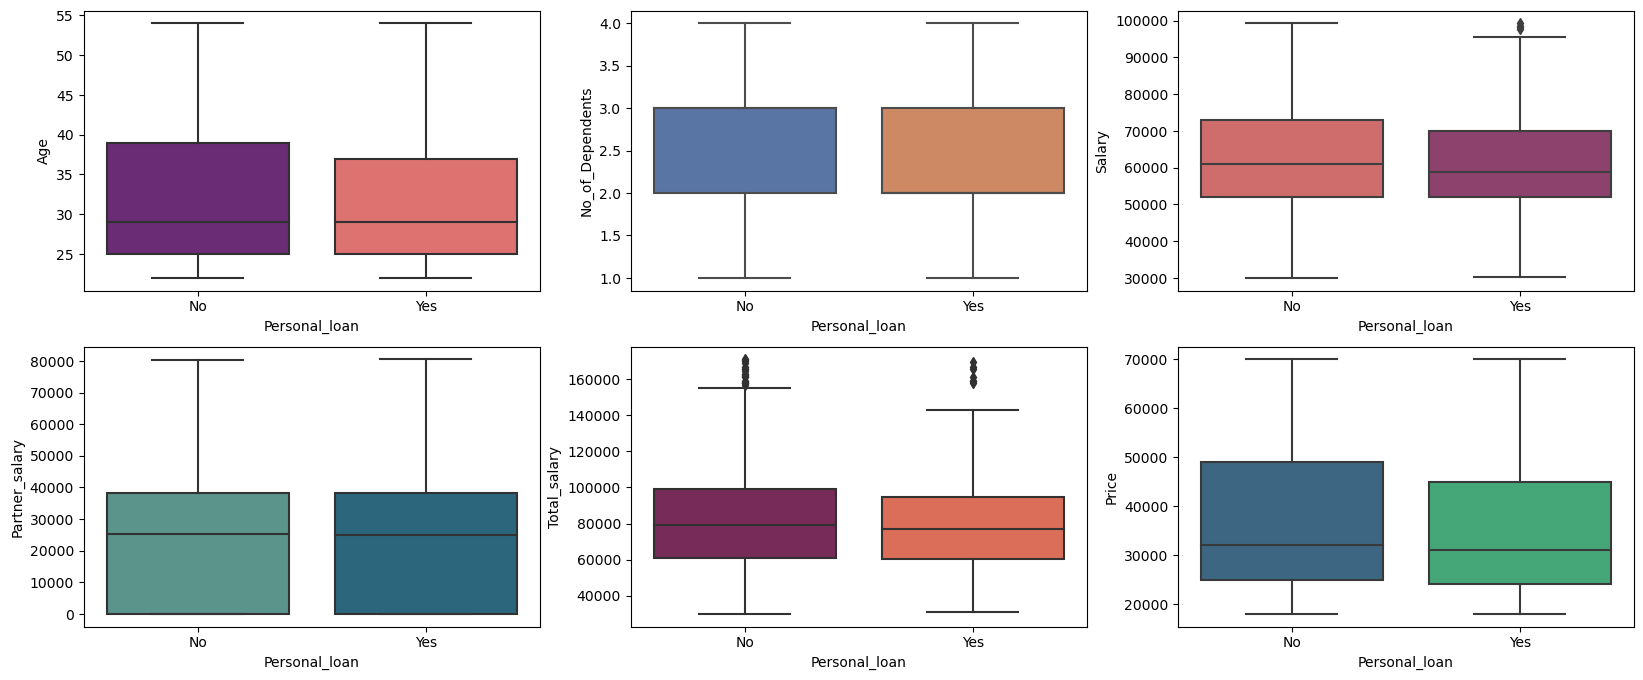

In [99]:
# e) Boxplots of 'Personal_loan' Vs all numerical variables
fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Personal_loan', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='Personal_loan', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Personal_loan', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='Personal_loan', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Personal_loan', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='Personal_loan', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights
* The boxplots for people taking personal loan and not taking pesonal loan is almost identical for the numerical categories.
* The minimum and maximum is almost the same for all the boxplots plotting personal loan against the numerical variables.

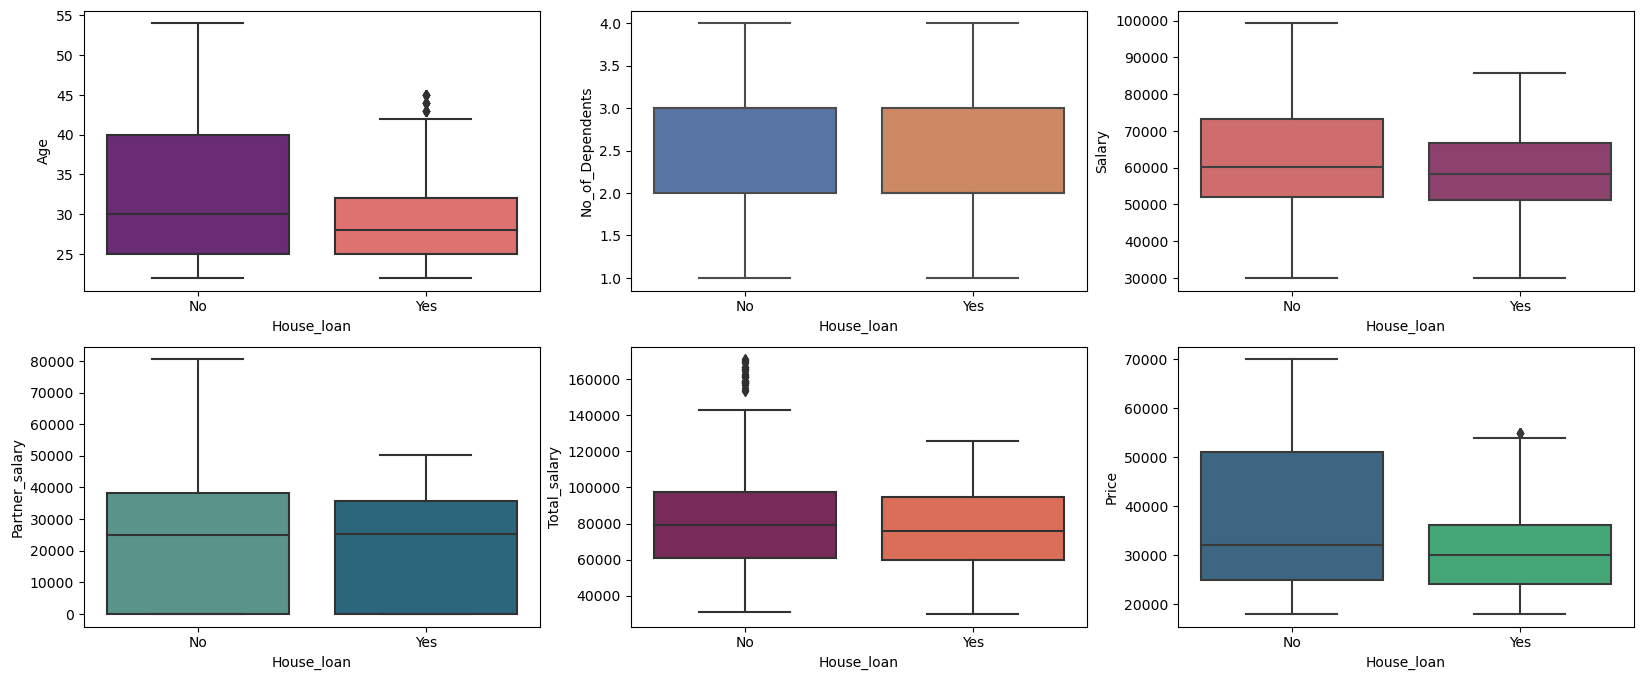

In [100]:
# f) Boxplots of 'House_loan' Vs all numerical variables
fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='House_loan', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='House_loan', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='House_loan', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='House_loan', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='House_loan', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='House_loan', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights
* The age of people having no house loan shows a lot of variability as compared to people who have a house loan.
* High outliers can be seen in people taking house loans with age and people not taking house loans with their total salary. 
* The median of all the box plots for both categories, that is, people taking and not taking house loans is the same.

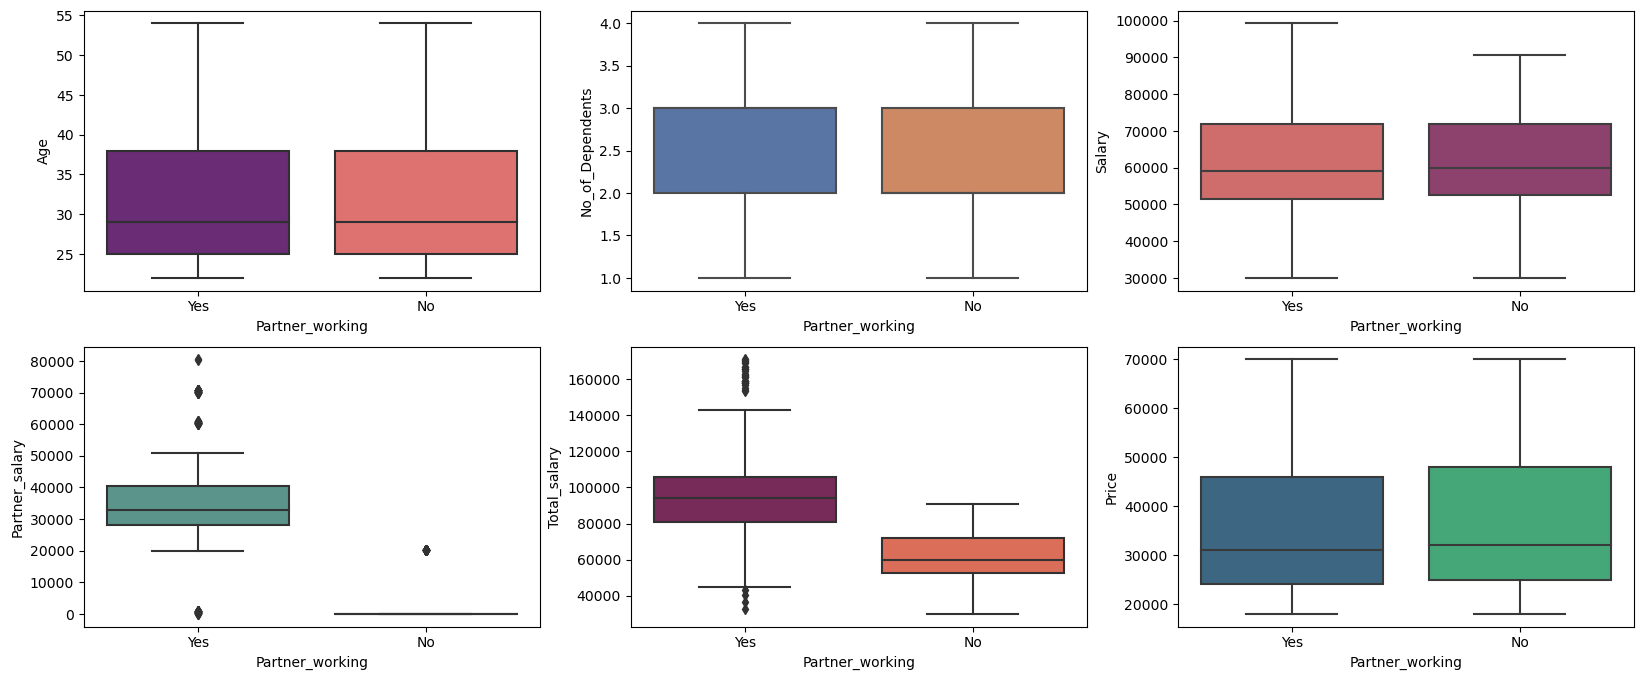

In [101]:
# g) Boxplots of Partner_working Vs all numerical variables
fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Partner_working', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='Partner_working', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Partner_working', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='Partner_working', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Partner_working', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='Partner_working', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights
* Partner_working has outliers in Partner_salary. Outliers can also be seen in Partner_working and Total_salary. 
* The median age, median salary and median price for working and not working partners is the same.
* If the partner is not working, the partner does not have any salary.  

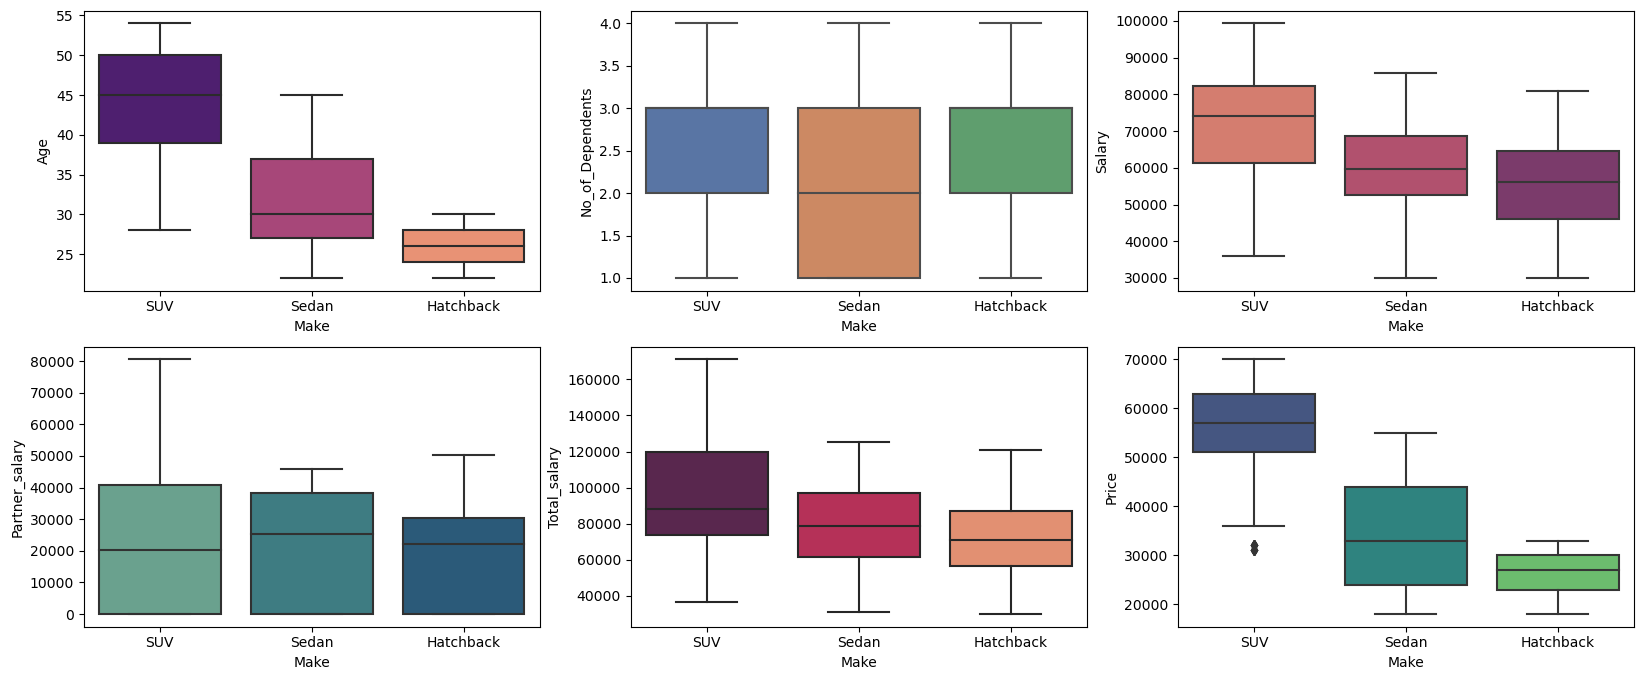

In [102]:
# h) Boxplots of 'Make' Vs all numerical variables
fig_dims=(20,8)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=fig_dims)
sns.boxplot(x='Make', y='Age', data=df_auto, palette='magma',ax=axs[0][0]);
sns.boxplot(x='Make', y='No_of_Dependents', data=df_auto, palette='deep',ax=axs[0][1]);
sns.boxplot(x='Make', y='Salary', data=df_auto, palette='flare',ax=axs[0][2]);
sns.boxplot(x='Make', y='Partner_salary', data=df_auto, palette='crest',ax=axs[1][0]);
sns.boxplot(x='Make', y='Total_salary', data=df_auto, palette='rocket',ax=axs[1][1]);
sns.boxplot(x='Make', y='Price', data=df_auto, palette='viridis',ax=axs[1][2]);

# Insights
Make vs Age
* The median age of SUV is much greater than the median age of Sedan and Hatchback.
* The SUV is left-skewed while Sedan is right-skewed.
* Both SUV and Sedan show high variability.

Make vs No_of_Dependents
* Both SUV and Hatchback have low outliers for no. of dependents.
* Sedan has maximum variability.
* SUV and Hatchback have the same range for no. of dependents.

Make vs Salary
* Median salary of SUV is more than that of Sedan and Hatchback.
* ALl the three makes have almost the same range.

Make vs Partner_salary
* SUV has maximum variability.
* The maximum partner salary is for SUV make.

Make vs Total_salary
* Total salary for SUV is right skewed while that for Sedan and Hatchback is normally distributed.

Make vs Price
* SUV make has a low outlier.
* The median price for SUV is much greater than that of Sedan or Hatchback.
* Hatchback shows least variability.


# 2.3 Relationship between Categorical and Numerical Variables - An insight

•	The boxplots for people taking personal loan and not taking personal loan is almost identical for the numerical categories.
•	The minimum and maximum is almost the same for all the boxplots plotting personal loan against the numerical variables.
•	The age of people having no house loan shows a lot of variability as compared to people who have a house loan.
•	High outliers can be seen in people taking house loans with age, people not taking house loans with their total salary. 
•	The median of all the box plots for both categories, that is, people taking and not taking house loans is the same.
•	Partner_working has outliers in Partner_salary. Outliers can also be seen in Partner_working and Total_salary. 
•	The median age, median salary and median price for working and not working partners is the same.
•	If the partner is not working, the partner does not have any salary.  
•	The median age of SUV is much greater than the median age of Sedan and Hatchback.
•	The SUV is left-skewed while Sedan is right-skewed.
•	Both SUV and Sedan show high variability.
•	Both SUV and Hatchback have low outliers for no. of dependents.
•	Sedan has maximum variability.
•	SUV and Hatchback have the same range for no. of dependents.
•	Median salary of SUV is more than that of Sedan and Hatchback.
•	All the three makes have almost the same range.
•	SUV has maximum variability.
•	The maximum partner salary is for SUV make.
•	Total salary for SUV is right skewed while that for Sedan and Hatchback is normally distributed.
•	SUV make has a low outlier.
•	The median price for SUV is much greater than that of Sedan or Hatchback.
•	Hatchback shows least variability.


# 3. Problem 1 - Key Questions
# Explore the data to answer the following key questions: 


# 3.1. Do men tend to prefer SUVs more compared to women? 

In [103]:
pd.crosstab(df_auto['Gender'],df_auto['Make'],margins=True,normalize=True)

Make    Hatchback       SUV     Sedan      All
Gender                                        
Female   0.009609  0.108905  0.090327  0.20884
Male     0.353619  0.078155  0.359385  0.79116
All      0.363229  0.187060  0.449712  1.00000

<Axes: xlabel='Gender', ylabel='count'>

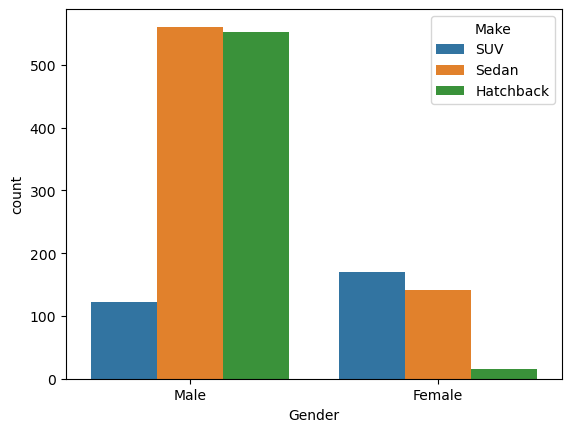

In [104]:
sns.countplot(data=df_auto, x='Gender', hue='Make')


Answer 1. Men don't prefer SUVs more compared to women. In fact, women prefer SUVs more than men, as seen from the plot above.
10.9% women prefer SUVs compared to only 7.8% men.

# 3.2. What is the likelihood of a salaried person buying a Sedan?

In [105]:
pd.crosstab(df_auto['Profession'],df_auto['Make'],margins=True,normalize=True).reset_index()

Make Profession  Hatchback       SUV     Sedan       All
0      Business   0.180013  0.056374  0.196028  0.432415
1      Salaried   0.183216  0.130685  0.253684  0.567585
2           All   0.363229  0.187060  0.449712  1.000000

The likelihood of a salaried person buying a Sedan is 25.04%.

# 3.3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 

In [106]:
df1 = df_auto[(df_auto['Gender']=='Male')&(df_auto['Make'] != 'Hatchback')]


In [107]:
df1['Profession'].value_counts()

Salaried    393
Business    290
Name: Profession, dtype: int64

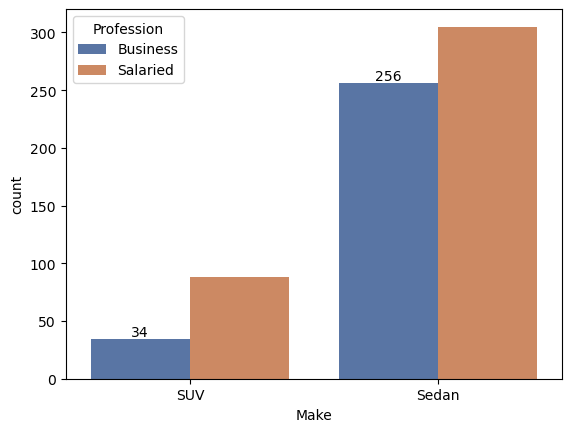

In [108]:
# Plotting a countplot of Salaried/Business Males and their preferences of the Make of cars.
# df1 database has all Male gender data.

splot = sns.countplot(df1, x='Make', hue='Profession', palette='deep')
plt.bar_label(splot.containers[0]);


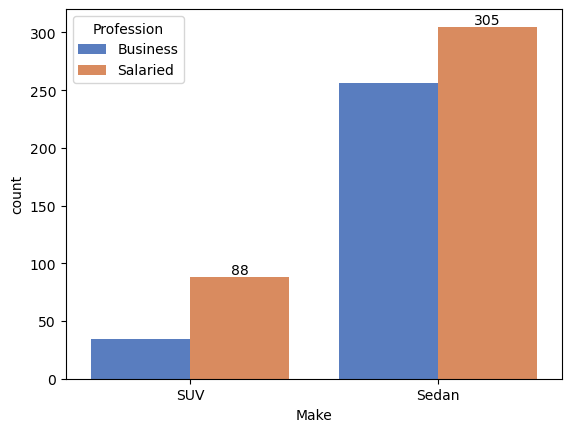

In [109]:
splot = sns.countplot(df1, x='Make', hue='Profession', palette='muted')
plt.bar_label(splot.containers[1]);

Answer:
* From the first plot, the ratio of the business males who buy SUV to Sedan is 34/256 = 0.132
* From the second plot, the ratio of the salaried males who buy SUV to Sedan is 88/305 = 0.288.

* It is clearly seen from the ratio in the countplot that the ratio of SUV to Sedan of salaried males is highest.

* Hence, Sheldon Cooper's claim is right that salaried male is an easier target for SUV sale than Sedan sale. 

# 3.4. How does the amount spent on purchasing automobiles vary by gender? 

In [110]:
df_auto.groupby(['Gender'])['Price'].sum()

Gender
Female    15541000
Male      40161000
Name: Price, dtype: int64

Men spend Rs. 40585000 in purchasing automobiles while females spend Rs.15695000. 
We see that males spend more than 2 times the amount spent by females in buying automobiles.

# 3.5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [111]:
df_auto.groupby(['Personal_loan'])['Price'].sum()

Personal_loan
No     28828000
Yes    26874000
Name: Price, dtype: int64

The people who took a personal loan spent Rs 27290000 (2 crore 72 lakh ninety thousand) on purchasing automobiles.

# 3.6. How does having a working partner influence the purchase of higher-priced cars?

In [112]:
df_auto["Price"]=pd.cut(df_auto['Price'], bins=3, labels=['Low', 'Med', 'High'])

In [113]:
df_auto.head(2)

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   

   Total_salary Price Make  
0        170000  High  SUV  
1        165800  High  SUV

In [114]:
df1 = df_auto[(df_auto.Price == 'High') & (df_auto.Partner_working == 'Yes')]
df1['Make'].value_counts()

SUV      100
Sedan     24
Name: Make, dtype: int64

<Axes: xlabel='Partner_working', ylabel='count'>

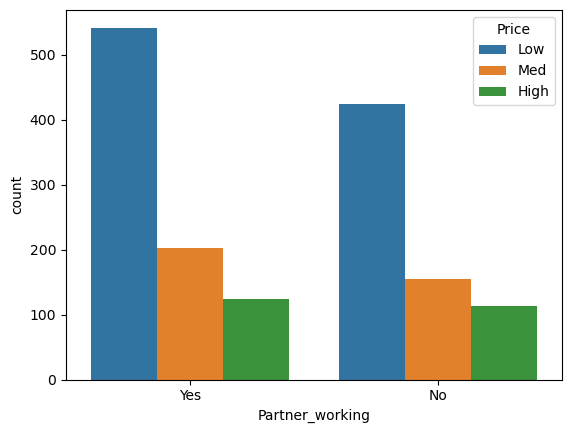

In [115]:
sns.countplot(df_auto, x='Partner_working', hue='Price')


From the bar plot, we can see that the purchase of high priced cars is not dependent on the partner working or not. Irrespective of partner working or not, people are buying high priced cars.

People with a high total salary(Salary + Partner_salary) greater than Rs.100000 and with their partners working buy higher-priced cars.

People whose partners are not working are also buying higher priced cars as seen by the orange coloured dots in the price of Rs. 50000 to Rs. 70000 range. 


# 4. Actionable Insights

•	Maximum number of people who buy cars are in the age group of 38 years. 
•	Number of male buyers outweigh the number of female buyers. Males constitute almost 80% of the population which buys cars while females constitute only 20%.
•	Salaried class of people prefer to buy cars more than the business class.
•	The target audience which buys cars is the married population. The married people buying cars is around 92% while the unmarried people make up the rest of the 8%.
•	Education too plays a role in buying cars, with the post graduates buying more cars as compared to the graduate population.
•	Another important factor in the car market is the house loan. It is seen that the people who do not have any house loan invest in higher-priced cars.
•	The most preferred car is the Sedan followed by the hatchback followed by the SUV.
•	We see a trend in age as well. As a person becomes older, he draws more income, as a result, he/she prefers higher-priced cars, but females have a tendency to buy higher priced cars. 
•	As age increases, people prefer SUVs and Sedans but do not go for Hatchbacks.
•	Men don't prefer SUVs more compared to women. In fact, women prefer SUVs more than men.
•	10.9% women prefer SUVs compared to only 7.8% men.
•	Men spend more than 2 times the amount spent by females in buying automobiles.
•	50% of car prices lie above 32K~. Customers with above 32k salary can be targeted for high value cars.
•	50% of the customer base has a personal loan. 66.7% of the customer does have a house loan. 
•	54.9% of the customers' partners are working who tend to buy high value cars.
  


# 5. Business Recommendations

. Potential customers for SUVs are the higher age group people. 
2. The low-priced cars, which is the hatchback, is mainly bought by males. So, the market for low-priced cars is men.
3. The market for Sedans and SUVs is men and women as both prefer to buy these cars. Female customers contribute more to SUV cars than male.
4. Salaried Male & Business Male contribute to 33.8% of the car sales which is sedan
5. The median price of cars is 50000 for females while it is 30000 for males. Hence, the market for high-priced cars rests with the females.
6. The people have taken house loans go for low-priced cars like Hatchback and do not buy SUVs at all.
7. The sale of Sedan type of cars is correlated with partner working.
8. The youngsters of age group 22 years to 30 years buy low-priced cars, that is, the hatchback.
9. People with higher salaries prefer to buy SUVs, with a median total income of 75000 dollars.	
10. First time buyers go for Hatchbacks.
11. Customers who do not have a house loan tend to buy high value cars (18%) and who contribute a high number of car purchases overall. The target customers without a house loan have higher probability for high value cars.
12. Customers with higher total salary where their age is 37+, gender as female and partner working status as yes have a high probability of getting SUV cars with high value.


************************************************PROJECT COMPLETED**********************************************

# 6. PROBLEM 2
A bank generates revenue through interest, transaction fees, and financial advice, with interest charged on customer loans being a significant source of profits. GODIGT Bank, a mid-sized private bank, offers various banking products and cross-sells asset products to existing customers through different communication methods. However, the bank is facing high credit card attrition, leading them to reevaluate their credit card policy to ensure customers receive the right card for higher spending and intent, resulting in profitable relationships.

Objective
As a Data Scientist at the company and the Data Science team has shared some data. You are supposed to find the key variables that have a vital impact on the analysis which will help the company to improve the business.

In [116]:
os.getcwd()

'C:\\Users\\ramas\\Great Learning\\SMDM'

# 6.1 Loading the libraries and dataset

In [117]:
df_cc=pd.read_excel('godigt_cc_data.xlsx')

In [118]:
df_cc.shape

(8448, 28)

The dataset godigt_cc has 8448 rows and 28 columns.

In [119]:
df_cc.head(3)

userid              card_no  card_bin_no Issuer   card_type  \
0       1  4384 39XX XXXX XXXX       438439   Visa        edge   
1       2  4377 48XX XXXX XXXX       437748   Visa  prosperity   
2       3  4377 48XX XXXX XXXX       437748   Visa     rewards   

  card_source_date high_networth  active_30  active_60  active_90  ...  \
0       2019-09-29             B          0          1          1  ...   
1       2002-10-30             A          1          1          1  ...   
2       2013-10-05             C          0          0          0  ...   

   bank_vintage  T+1_month_activity  T+2_month_activity T+3_month_activity  \
0            27                   0                   0                  0   
1            52                   0                   0                  0   
2            23                   1                   0                  0   

   T+6_month_activity  T+12_month_activity  Transactor_revolver  \
0                   0                    0                    T   
1                   0                    0                    R   
2                   0                    0                    R   

  avg_spends_l3m  Occupation_at_source  cc_limit  
0          27729         Self Employed    290000  
1         280854                     0    950000  
2          70587               Student    210000  

[3 rows x 28 columns]

In [120]:
df_cc.select_dtypes(include=['int64']).columns

Index(['userid', 'card_bin_no', 'active_30', 'active_60', 'active_90',
       'cc_active30', 'cc_active60', 'cc_active90', 'widget_products',
       'engagement_products', 'annual_income_at_source', 'bank_vintage',
       'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity',
       'T+6_month_activity', 'T+12_month_activity', 'avg_spends_l3m',
       'cc_limit'],
      dtype='object')

There are 19 numerical variables in the dataset. 

In [121]:
df_cc.select_dtypes(include=['object']).columns.value_counts()

card_no                  1
Issuer                   1
card_type                1
high_networth            1
hotlist_flag             1
other_bank_cc_holding    1
Transactor_revolver      1
Occupation_at_source     1
dtype: int64

There are 8 categorical variables in the dataset.

In [122]:
df_cc.select_dtypes(include=['datetime']).columns.value_counts()

card_source_date    1
dtype: int64

The dataset has 19 numerical variables, 8 categorical variables and 1 datetime variable.

# Checking for Null values

In [123]:
df_cc.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

The column 'Transactor_revolver' consists of null values.

# 6.2 Initial questions that can be raised:
    

# 1. How many customers had their current account active in the last 30 days, 60 days and 90 days?

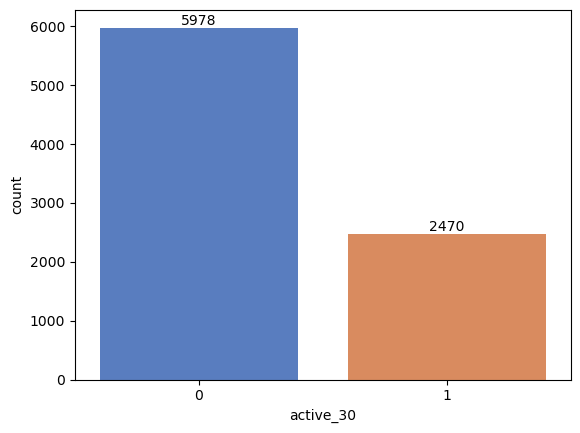

In [124]:
splot=sns.countplot(df_cc, x='active_30', palette='muted')
plt.bar_label(splot.containers[0]);

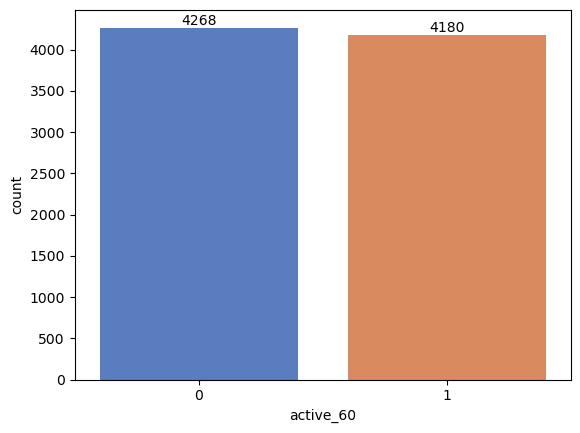

In [125]:
splot=sns.countplot(df_cc, x='active_60', palette='muted')
plt.bar_label(splot.containers[0]);

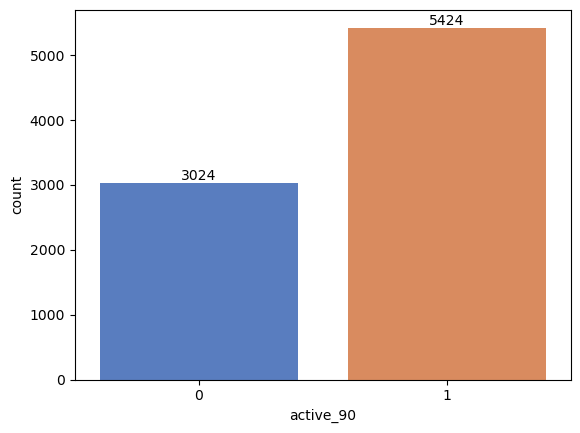

In [126]:
splot=sns.countplot(df_cc, x='active_90', palette='muted')
plt.bar_label(splot.containers[0]);

From the above plots, we observe that in the last 30 days, the salary/current accounts of 5978 people are not active, while the accounts of 2470 are active.
On the other hand, around 3000 accounts are not active in the last 90 days, while 5424 accounts are active in the last 90 days. 
We see that in the last 60 days, almost an equal number have their accounts active as well as inactive.

# 2. Does the annual income of a person affect the credit card limit?

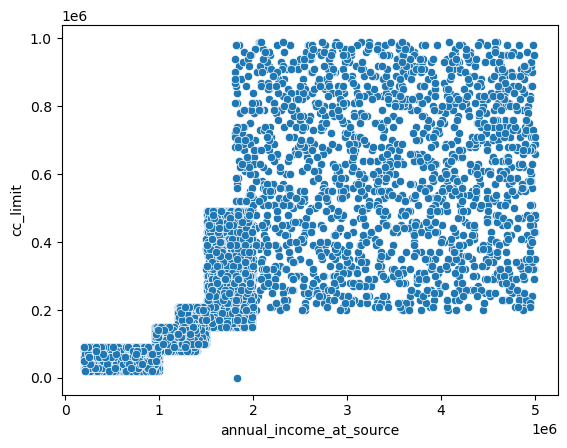

In [127]:
sns.scatterplot(x='annual_income_at_source', y='cc_limit', data=df_cc);

In [128]:
df_cc['cc_limit'].corr(df_cc['annual_income_at_source'])

0.7718863866136355

We see that there is a direct correlation between cc_limit and the annual_income_at_source. 
As annual income increases, the credit card limit of spending also increases. 
Having said that, people with the same annual income have different credit card limits. 
We need to dig deeper to understand this aspect.


# 3. Is there any relation between the income earned by the customer and his/her average spend in the last three months?

<Axes: xlabel='annual_income_at_source', ylabel='avg_spends_l3m'>

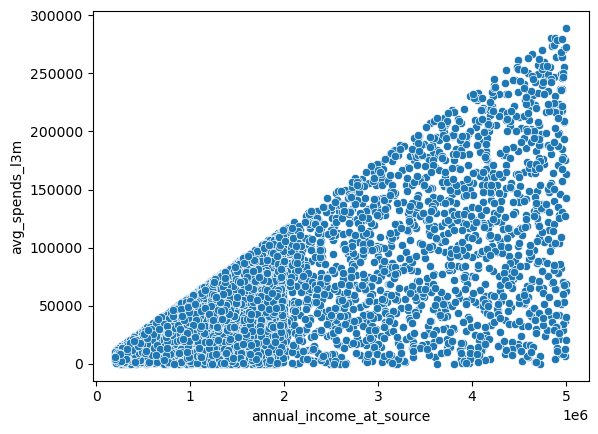

In [129]:
sns.scatterplot(df_cc, x='annual_income_at_source', y='avg_spends_l3m')

We see from the scatter plot that as the annual income increases, the average spends in the last 3 months also increases. However,the scatter plot also shows that people at all income levels have 0 spends in the last three months.

# 4. How many cards are issued to the high networth people?

In [130]:
df_cc.describe(include='object').T

count unique                  top  freq
card_no                8448     11  4262 41XX XXXX XXXX  2084
Issuer                 8448      3                 Visa  7279
card_type              8448     15              rewards  1502
high_networth          8448      5                    A  1740
hotlist_flag           8448      2                    N  8410
other_bank_cc_holding  8448      2                    Y  4728
Transactor_revolver    8410      2                    T  7115
Occupation_at_source   8448      6             Salaried  3918

In [131]:
df_cc['high_networth'].value_counts()

A    1740
D    1696
E    1693
B    1660
C    1659
Name: high_networth, dtype: int64

<Axes: xlabel='high_networth', ylabel='count'>

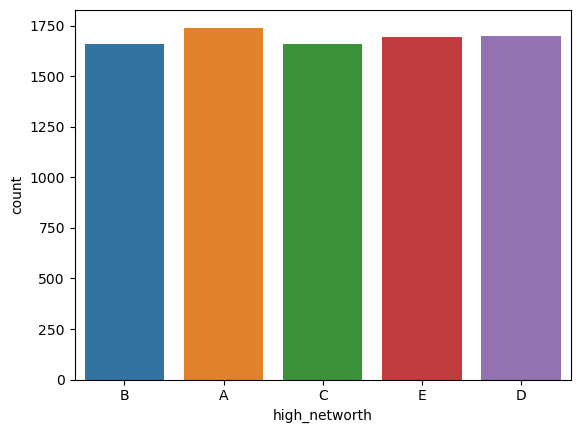

In [132]:
sns.countplot(df_cc, x='high_networth')

We see that highest networth customers (A grade) have used the card 1740 times while the lowest networth, which is E grade, has used the credit card 1693 times. THe lowest among the high networth customers is the C grade customers who used the card 1659 times.

# 5. Which occupation makes use of credit cards the maximum number of times?

<Axes: xlabel='Occupation_at_source', ylabel='count'>

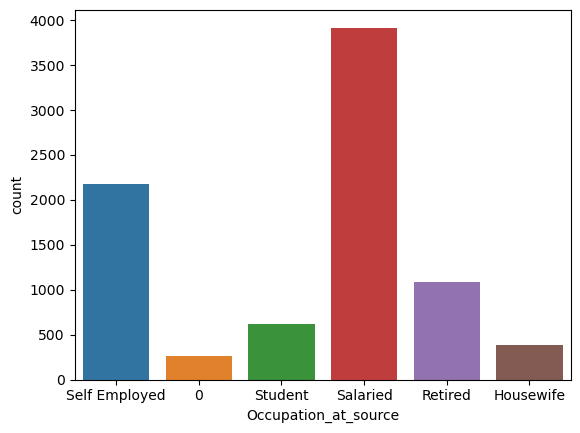

In [133]:
sns.countplot(df_cc, x='Occupation_at_source')

From the graph, it is clear that the salaried people use the credit card the maximum number of times, followrd by self employed people. The retired peple come third followed by student and housewife. The people with 0 salary use the credit card the least number of times.


# 6. Determine the usage of high networth people of different occupations.

In [134]:
ct=pd.crosstab(df_cc['Occupation_at_source'], df_cc['high_networth'], margins=True)
ct

high_networth            A     B     C     D     E   All
Occupation_at_source                                    
0                      261     0     0     0     0   261
Housewife                0     3    71   160   150   384
Retired                  3    10   238   402   436  1089
Salaried               725   789   795   811   798  3918
Self Employed          621   713   445   204   192  2175
Student                130   145   110   119   117   621
All                   1740  1660  1659  1696  1693  8448

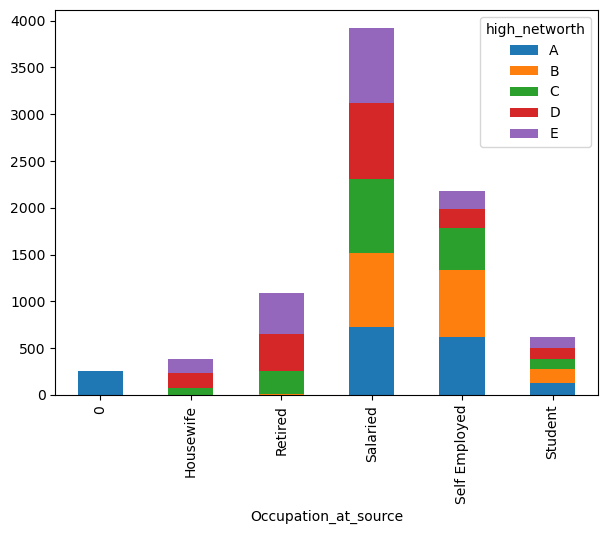

In [135]:
ct=pd.crosstab(df_cc['Occupation_at_source'], df_cc['high_networth'], margins=True)
ct.drop('All', inplace=True)
ct.drop('All', axis=1, inplace=True)
ct.plot.bar(stacked=True, figsize=(7,5))
plt.show()

A salaried employee, irrespective of the grades of networth, is spending the same amount of money on credit cards.
A student's spending capacity is very less. A self-employed person spending more on credit card goes to the B networth followed by A.
A retired person of E grade spends more than C and D grade retired persons.

# 7. Does being a Revolver affect the average spend in the last 3 months?

<Axes: xlabel='high_networth', ylabel='avg_spends_l3m'>

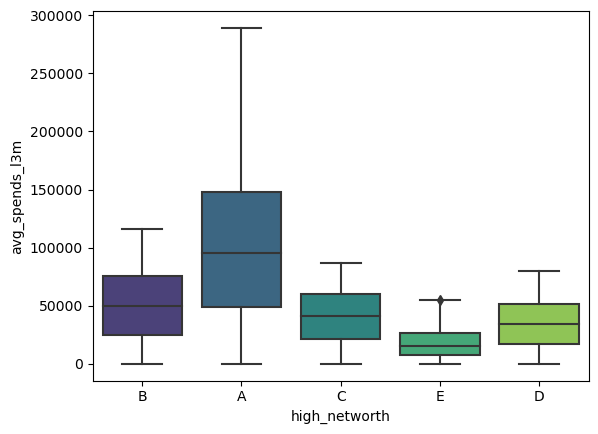

In [136]:
sns.boxplot(df_cc, x='high_networth', y='avg_spends_l3m', palette='viridis')


A, the highest networth category has a median spending in the last 3 months to 100000, while the lowest networth, that is, E has a median spend of around 20000.

# 8. Which type of card is the most used?

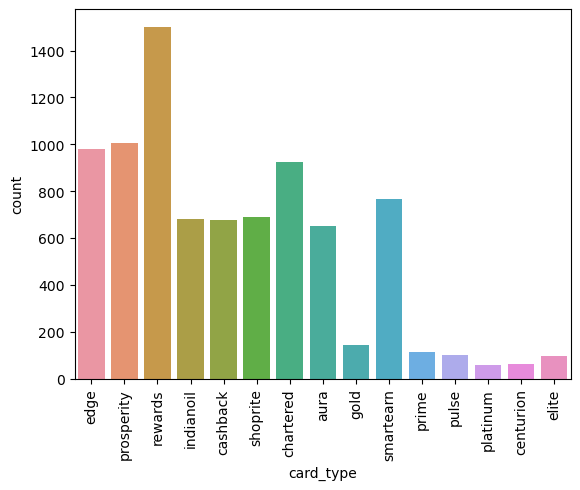

In [137]:
sns.countplot(df_cc, x='card_type')
plt.xticks(rotation=90);

In [138]:
df_cc['card_type'].value_counts()

rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

We can see that the 'rewards' card type is the most used by the customers followed by 'prosperity' type. The least used card type is 'platinum' cards.

# 9. Compare the numerical variables with each other.

<Axes: >

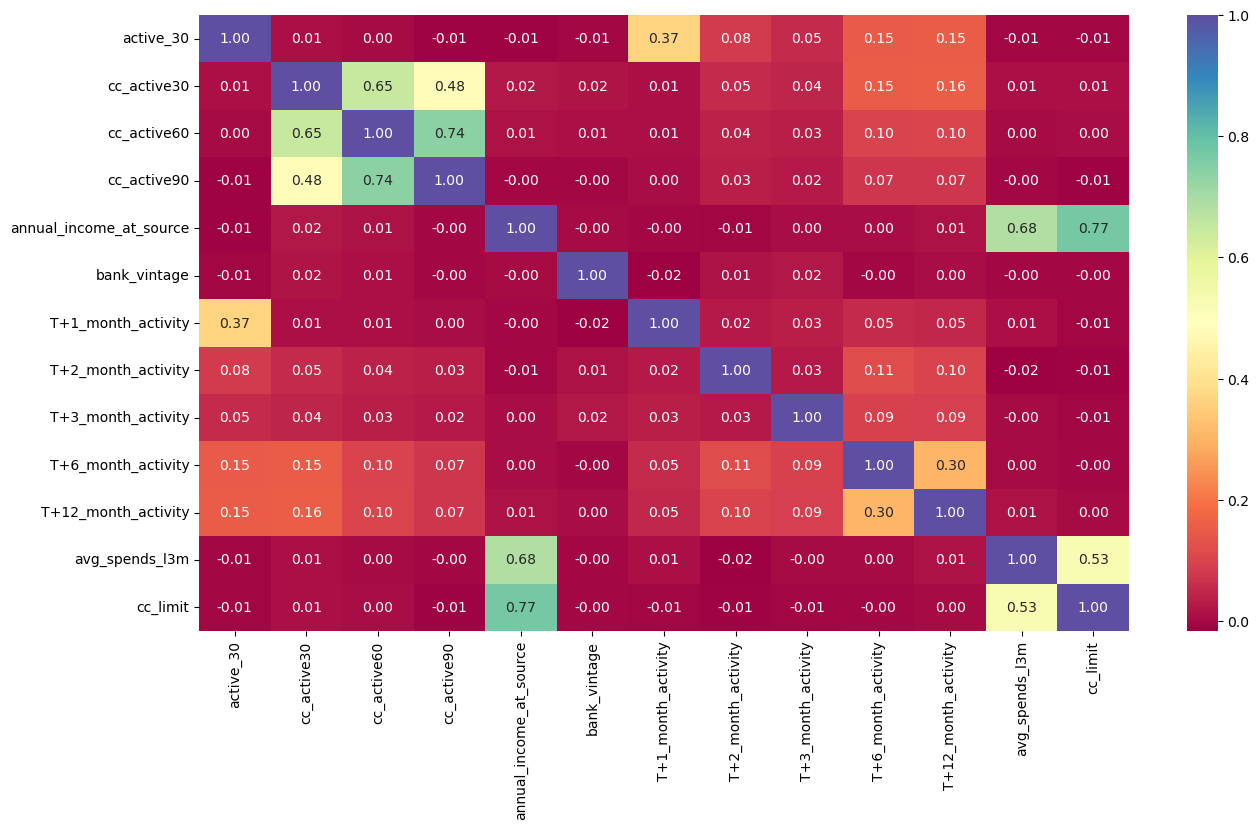

In [139]:
plt.figure(figsize=(15,8))
sns.heatmap(df_cc[['active_30','cc_active30','cc_active60','cc_active90','annual_income_at_source','bank_vintage', 'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity','T+6_month_activity','T+12_month_activity','avg_spends_l3m', 'cc_limit']].corr(), annot=True, cmap='Spectral', fmt='.2f')

We see that there is a correlation between:
a) cc_limit and annual_income_at_source
b) cc_limit and bank_vintage
c) avg_spends_l3m and bank_vintage
d) bank_vintage and annual_income_at_source
e) avg_spends_l3m and annual_income_at_source
f) cc_limit and avg_spends_l3m 

We need to analyse these fields further to get a deeper insight.

# 10. How does card types vary with the annual income?

C:\Users\ramas\AppData\Local\Temp\ipykernel_27928\4065778154.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  bars = sns.barplot(data=df_cc, x='card_type', y='annual_income_at_source', ci=False);


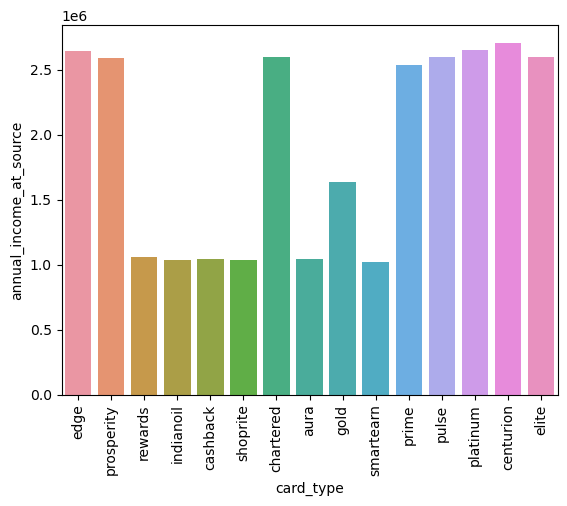

In [140]:
bars = sns.barplot(data=df_cc, x='card_type', y='annual_income_at_source', ci=False);
plt.xticks(rotation=90);

<Axes: xlabel='other_bank_cc_holding', ylabel='count'>

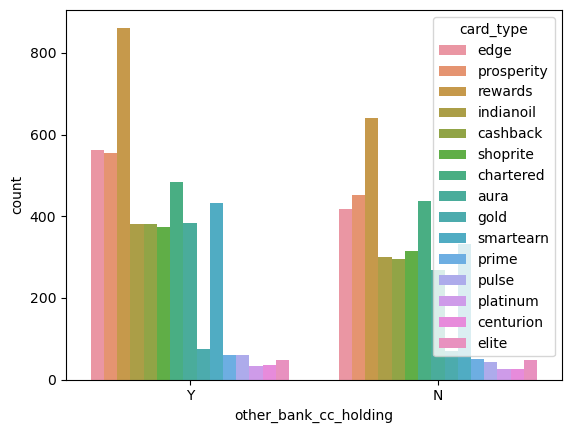

In [150]:
sns.countplot(df_cc, x='other_bank_cc_holding', hue='card_type')

As seen from the bar plot, high income groups prefer centurion cards, and then platinum, chartered and edge cards, followed by elite, prime and prosperity. The people with lesser income prefer shoprite and smartearn cards. 

# 11. Are cards which are hotlisted used for credit card transactions?

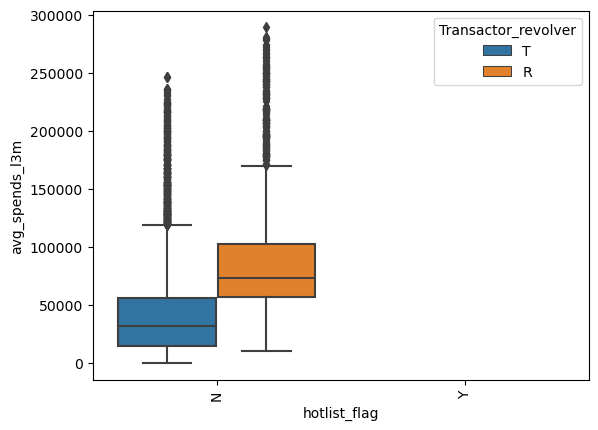

In [141]:
sns.boxplot(df_cc, x='hotlist_flag', y='avg_spends_l3m', hue='Transactor_revolver')
plt.xticks(rotation=90);

None of the hotlisted cards are used for credit card transactions. We see that the median spends of Revolvers is much more than the median salary of the Transactors. 

# 12. Does a Transactor or a Revolver affect the average spend in the last three months?

C:\Users\ramas\AppData\Local\Temp\ipykernel_27928\2667268090.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  bar=sns.barplot(data=df_cc, x='Transactor_revolver', y='avg_spends_l3m',ci=False);


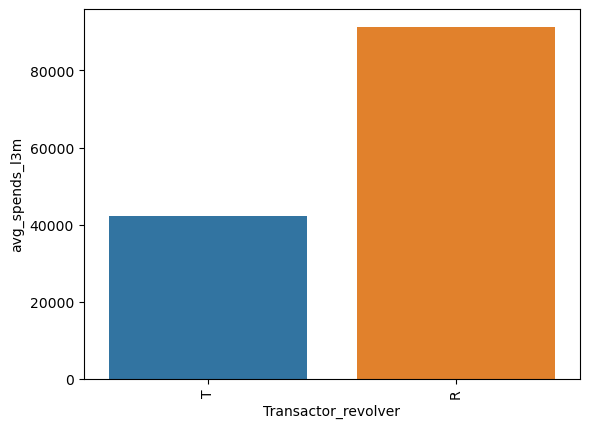

In [142]:
bar=sns.barplot(data=df_cc, x='Transactor_revolver', y='avg_spends_l3m',ci=False);
plt.xticks(rotation=90);

The Revolver spends more than double the money through credit cards spent by a transactor in the last 3 months spending. Thus, a Revolver helps in increasing the credit card revenue.

# 13. Does holding cards from other banks affect the credit card payments?

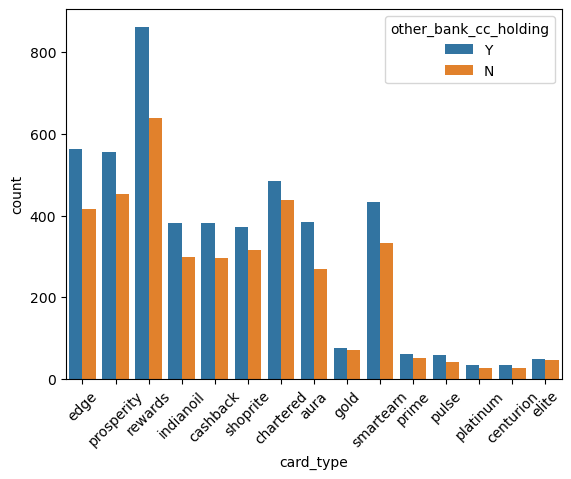

In [143]:
sns.countplot(df_cc, x='card_type', hue='other_bank_cc_holding')
plt.xticks(rotation=45);

As we can see from the countplot, the customers spend more money through credit cards of other banks. 

# 14. How are cards affected by a transactor or a revolver?

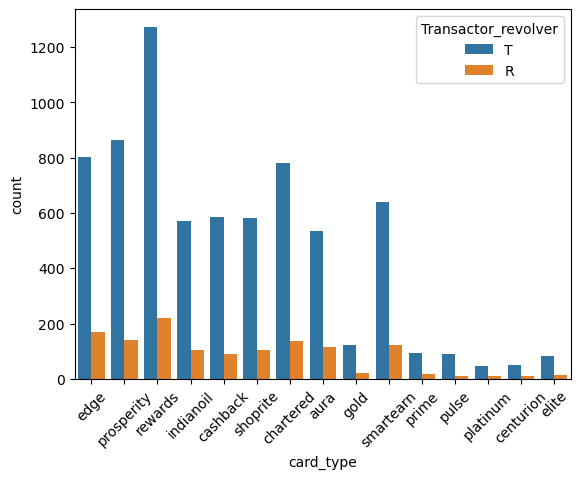

In [144]:
sns.countplot(df_cc, x='card_type', hue='Transactor_revolver')
plt.xticks(rotation=45);

Transactors' spending through credit cards is far more as compared to the revolvers.

# 15. Does a high networth card help in more spendings as compared to other bank credit cards?

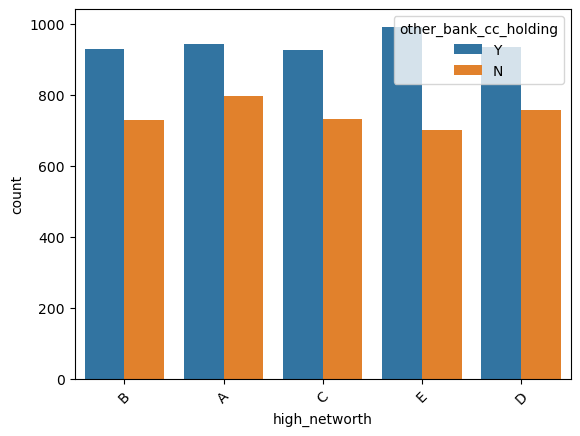

In [145]:
sns.countplot(df_cc, x='high_networth', hue='other_bank_cc_holding')
plt.xticks(rotation=45);

We see that other bank cards swipe in more times than the current bank credit card. 

# 16. Does profession of the customer affect holding other bank credit cards?

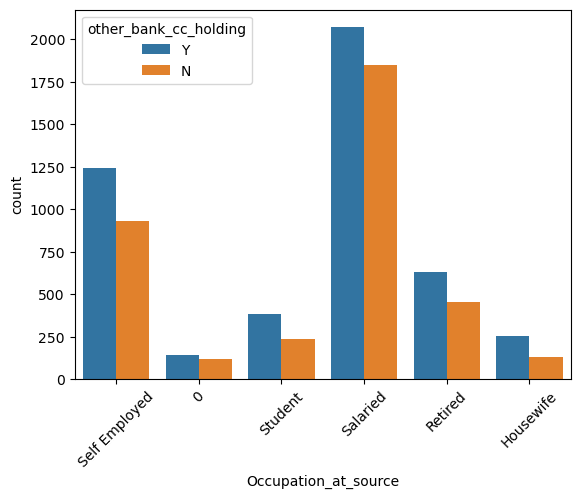

In [146]:
sns.countplot(df_cc, x='Occupation_at_source', hue='other_bank_cc_holding')
plt.xticks(rotation=45);

A salaried professional has multiple cards and spends more through other bank cards. For all professions, other bank credit cards are swiped more.

# 17. Can salaried professionals also be transactors and revolvers?

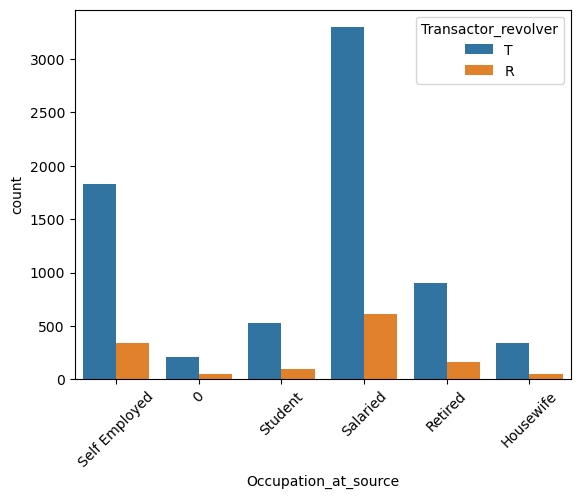

In [147]:
sns.countplot(df_cc, x='Occupation_at_source', hue='Transactor_revolver')
plt.xticks(rotation=45);

As we can clearly see that the salaried professionals are mostly transactors. In the self-employed, students, retired and the housewives, the transactors outnumber the revolvers.

# 18. How does other bank credit cards affect Transactors and Revolvers?

<Axes: xlabel='other_bank_cc_holding', ylabel='count'>

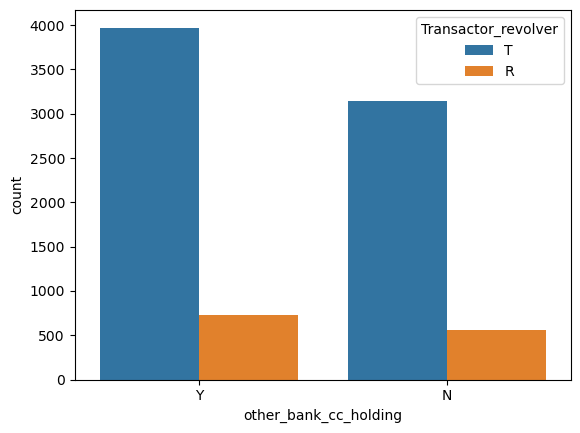

In [148]:
sns.countplot(df_cc, x='other_bank_cc_holding', hue='Transactor_revolver')

It is clearly seen that the Transactors with other bank credit cards are much more in number as compared to revolvers with other bank credit cards.  The transactors with no credit cards from other banks outnumber the revolvers with no credit cards from other banks.

# 19. How do the people in various occupations use other bank credit cards?

<Axes: xlabel='other_bank_cc_holding', ylabel='count'>

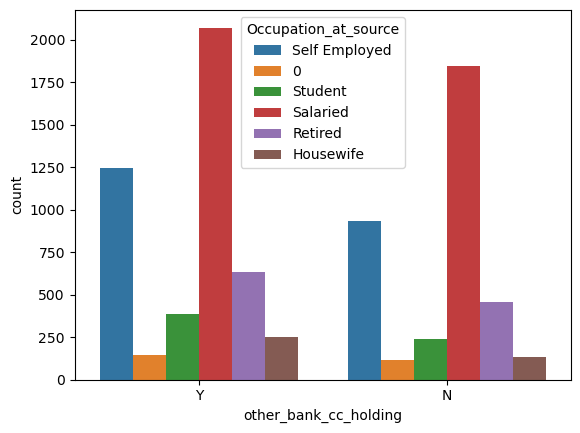

In [149]:
sns.countplot(df_cc, x='other_bank_cc_holding', hue='Occupation_at_source')

# 6.3 The top 5 variables that have a vital impact on the analysis which will help the company to improve the business are:

1) annual_income_at_source

2) other_bank_cc_holding

3) avg_spends_l3m

4) Transactor_revolver

5) card type